# Project (1): Investigating Soccer Database

## Analysis Research Question

### 1- Which teams had scored the max number of goals ?

### 2- What are the team attributes most correlated to scoring the max number of goals ?

### 3- Which players had the max OVR (overall rating) ?

### 4- What are the player attributes most correlated to the max OVR (overall rating) ?

### 5- Which players had the most penalties ?

### 6- Which leagues had scored the max number of goals ?


In [1]:
#imports

import sys

import numpy as np

from numpy import percentile as per

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import sqlite3 as sql # We will use this library to make a connection to our database

from IPython.display import display # To display the dataframe for each table in a visually pleasing way

from sklearn.impute import SimpleImputer

## 1- Accessing our database (soccer database)

In [2]:
#Accessing our database using sqlite3 and pandas

database = 'datasets\egyfwd\database.sqlite'

connection = sql.connect(database)

db_tables = pd.read_sql('''select * from sqlite_master where type ='table'; ''',con = connection)

db_tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [3]:
'''
Creating a dataframe for each table in the database and saving them in a dictionary

In which the keys are the table names and the values are the table dataframes

'''

table_names = [name for name in list(db_tables.name)]

df_tables = {} 

select_st = 'select * from ' # The select statemnet which will be added to the table_name in each loop to form a query statement

for table_name in table_names:
    
    query = f'{select_st + table_name}' # The query statemnet
    
    df_tables[table_name] = pd.read_sql(query,connection) # This is the dictionary used to save the table dataframes

## 2- Exploring our database

In [4]:
'''
Preparing a function to explore each table in our database as the following:

-> Getting the basic information for each table 

    * Table Name  
    * Number of rows 
    * Number of coulmns 
    * Number of duplicated rows  
    * Number of null values

-> Displaying the first 5 rows from each table

-> Exploring the columns names and data types for each table

-> Exploring the summary descriptive statistics for each table


''' 

def explore_tables():
    
    pd.set_option('display.max_rows',1000)

    pd.set_option('display.max_columns',1000) 

    for df_name , df in df_tables.items():

        if df_name != 'sqlite_sequence':
            
            print('----------------------------------------------' * 2,'\n')

            print('Table Name: ',df_name,'\n')
                 
            print('Number of rows = ', df.shape[0],'\n')
            
            print('Number of columns = ', df.shape[1],'\n')
            
            print('Number of duplicated rows = ', df.duplicated().sum(),'\n')
            
            print('Number of null values = ',df.isna().sum().sum(),'\n')
            
            display(df.head())
            
            print('\n','--------------Column names and data types--------------','\n')
 
            display(df.info())
    
            print('\n','--------------Summary descriptive statistics--------------')
            
            display(df.describe())
    

In [5]:
# Let's explore!

explore_tables()

-------------------------------------------------------------------------------------------- 

Table Name:  Player_Attributes 

Number of rows =  183978 

Number of columns =  42 

Number of duplicated rows =  0 

Number of null values =  47301 



,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0



 --------------Column names and data types-------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribblin

None


 --------------Summary descriptive statistics--------------


,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,59.175154,52.965675,49.380950,57.069880,63.388879,67.659357,68.051244,65.970910,66.103706,65.189496,61.808427,66.969045,67.038544,67.424529,53.339431,60.948046,52.009271,55.786504,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,17.744688,18.255788,17.831746,14.394464,15.196671,12.983326,12.569721,12.954585,9.155408,13.063188,16.135143,11.006734,13.165262,12.072280,18.367025,16.089521,19.450133,18.448292,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,10.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,49.000000,58.000000,61.000000,62.000000,58.000000,61.000000,58.000000,54.000000,60.000000,61.000000,60.000000,41.000000,51.000000,34.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,67.000000,69.000000,69.000000,68.000000,67.000000,67.000000,65.000000,68.000000,69.000000,69.000000,58.000000,64.000000,57.000000,60.000000,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,67.000000,73.000000,77.000000,77.000000,75.000000,72.000000,74.000000,73.000000,74.000000,76.000000,76.000000,67.000000,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


-------------------------------------------------------------------------------------------- 

Table Name:  Player 

Number of rows =  11060 

Number of columns =  7 

Number of duplicated rows =  0 

Number of null values =  0 



,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154



 --------------Column names and data types-------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


None


 --------------Summary descriptive statistics--------------


,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


-------------------------------------------------------------------------------------------- 

Table Name:  Match 

Number of rows =  25979 

Number of columns =  115 

Number of duplicated rows =  0 

Number of null values =  407395 



,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67



 --------------Column names and data types-------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


None


 --------------Summary descriptive statistics--------------


,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,24158.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.00000,24147.000000,24147.000000,24147.000000,24146.000000,24146.000000,24140.000000,24158.000000,24158.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.00000,24147.000000,24147.0,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24146.000000,24146.000000,24140.000000,24755.000000,24664.000000,24698.000000,24656.000000,24663.000000,24654.000000,24752.000000,24670.000000,24706.000000,24543.000000,24424.000000,24745.000000,24701.000000,24686.000000,24658.000000,24644.000000,24666.000000,24744.000000,24638.000000,24651.000000,24538.000000,24425.000000,22592.000000,22592.000000,22592.000000,22575.000000,22575.000000,22575.000000,22520.000000,22520.000000,22520.000000,22556.000000,22556.000000,22556.000000,11168.000000,11168.000000,11168.000000,22571.000000,22571.000000,22571.000000,17097.000000,17097.000000,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,2.073516,4.061001,6.049199,7.544871,3.185158,4.769909,5.309604,5.822048,5.389407,5.783244,1.000290,2.074585,4.058558,6.052222,7.52549,3.195387,4.742660,5.294115,5.807546,5.476187,5.766114,0.999627,2.998634,3.000083,3.000414,3.237214,6.476954,6.672257,7.238953,8.026339,9.218868,10.43699,1.000248,3.0,3.000166,3.000248,3.245124,6.469706,6.680292,7.246366,8.022115,9.161186,10.455178,76638.362432,106854.091996,91601.289457,94540.204494,109527.842071,102308.768516,97287.636918,107290.992947,111131.536914,105612.508373,103413.870660,76628.199879,107614.617424,91126.781293,95083.910617,109800.936901,102308.262588,97898.056014,109265.114214,111087.003448,107149.115943,104932.876970,2.628818,3.839684,4.662222,2.559245,3.747597,4.396949,2.467613,3.608932,4.150575,2.536202,3.711740,4.385351,2.816447,4.132324,4.972744,2.578737,3.665295,4.482585,2.566061,3.755879,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,0.387185,0.385973,0.446024,1.609682,1.233609,1.092386,1.687376,1.968550,1.492068,0.759585,0.033438,0.403572,0.387047,0.448413,1.63765,1.284060,1.118226,1.687324,1.957116,1.541351,0.763611,0.024916,0.064003,0.012871,0.028777,0.940481,0.7

-------------------------------------------------------------------------------------------- 

Table Name:  League 

Number of rows =  11 

Number of columns =  3 

Number of duplicated rows =  0 

Number of null values =  0 



,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A



 --------------Column names and data types-------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


None


 --------------Summary descriptive statistics--------------


,id,country_id
count,11.000000,11.000000
mean,12452.090909,12452.090909
std,8215.308472,8215.308472
min,1.000000,1.000000
25%,6289.000000,6289.000000
50%,13274.000000,13274.000000
75%,18668.000000,18668.000000
max,24558.000000,24558.000000


-------------------------------------------------------------------------------------------- 

Table Name:  Country 

Number of rows =  11 

Number of columns =  2 

Number of duplicated rows =  0 

Number of null values =  0 



,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy



 --------------Column names and data types-------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


None


 --------------Summary descriptive statistics--------------


,id
count,11.000000
mean,12452.090909
std,8215.308472
min,1.000000
25%,6289.000000
50%,13274.000000
75%,18668.000000
max,24558.000000


-------------------------------------------------------------------------------------------- 

Table Name:  Team 

Number of rows =  299 

Number of columns =  5 

Number of duplicated rows =  0 

Number of null values =  11 



,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB



 --------------Column names and data types-------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


None


 --------------Summary descriptive statistics--------------


,id,team_api_id,team_fifa_api_id
count,299.000000,299.000000,288.000000
mean,23735.301003,12340.521739,21534.305556
std,15167.914719,25940.411135,42456.439408
min,1.000000,1601.000000,1.000000
25%,9552.500000,8349.000000,178.750000
50%,22805.000000,8655.000000,673.500000
75%,36250.500000,9886.500000,1910.750000
max,51606.000000,274581.000000,112513.000000


-------------------------------------------------------------------------------------------- 

Table Name:  Team_Attributes 

Number of rows =  1458 

Number of columns =  25 

Number of duplicated rows =  0 

Number of null values =  969 



,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover



 --------------Column names and data types-------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           145

None


 --------------Summary descriptive statistics--------------


,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


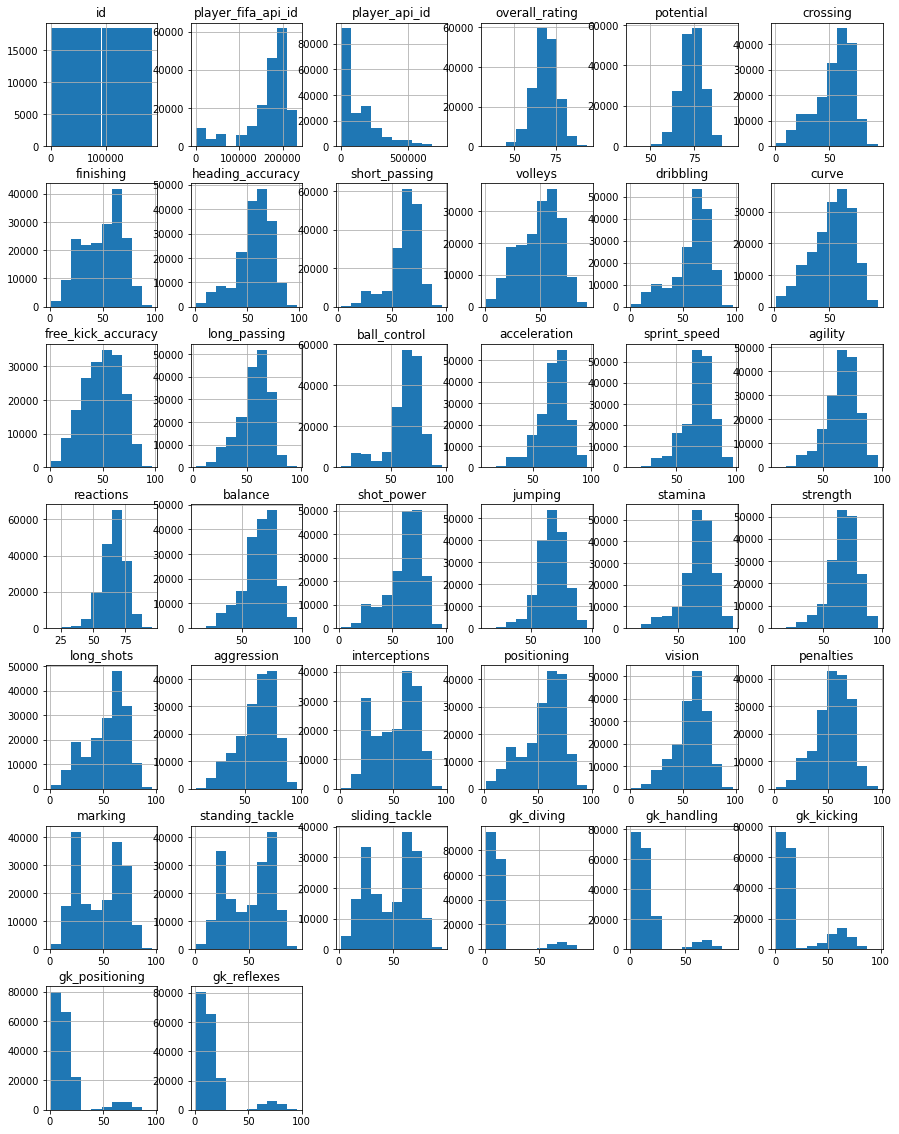

In [6]:
# Histograms of the Player_Attributes table

df_tables['Player_Attributes'].hist(layout = (7,6),figsize=(15,20))

plt.show()

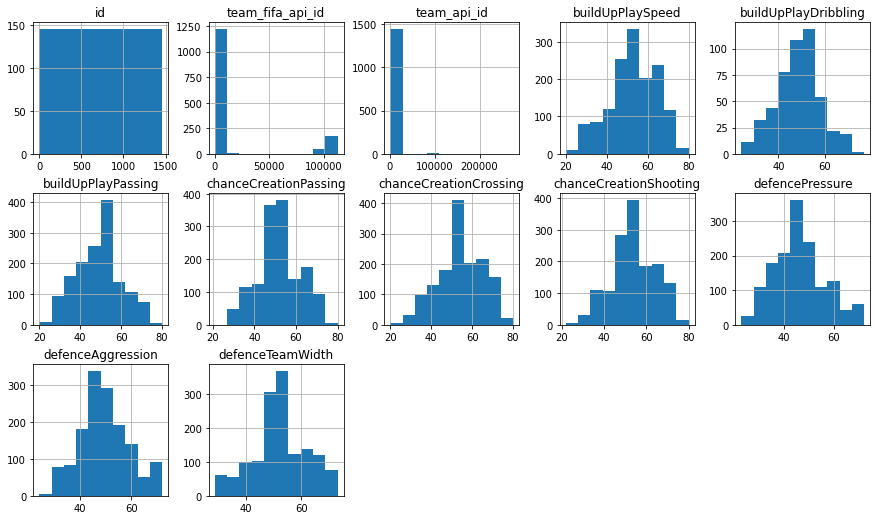

In [7]:
# Histograms of the Team_Attributes table

df_tables['Team_Attributes'].hist(layout = (5,5),figsize=(15,15))

plt.show()

## 3- checking data types

### Notes

-> There is a column which contains a date information in each of the following tables: 
 
     *Player_Attributes (column name: date)
 
     *Player (column name: birthday)
    
     *Match (column name: date)
    
     *Team_Attributes (column name: date)

### Decisions

-> Prepare a function to do the following:

    *Converting the column data type from "object" to "datetime" 

    *Extracting the year, month and day into new columns

In [8]:
def convert_extract_date():
    
    date_tables = ['Player_Attributes','Player','Match','Team_Attributes']

    date_columns = ['date','birthday','date','date']
    
    for table_name , col_name in zip(date_tables,date_columns):

        df_tables[table_name][col_name] = pd.to_datetime(df_tables[table_name][col_name]) # Converting to datetime

        df_tables[table_name]['year'] = pd.DatetimeIndex(df_tables[table_name][col_name]).year # Extracting the year

        df_tables[table_name]['month'] = pd.DatetimeIndex(df_tables[table_name][col_name]).month # Extracting the month

        df_tables[table_name]['day'] = pd.DatetimeIndex(df_tables[table_name][col_name]).day # Extracting the day
        


In [9]:
# Applying the convert_extract_date function

convert_extract_date()

## 4- checking for duplicates


### Notes

-> Fortunately, there is no table with duplicated rows in our database

### Decisions

-> No action is needed

## 5- checking for null & missing values 

### Notes

-> There are 4 tables which have columns with null values namely these tables are:

    *Match
    
    *Player_Attributes
    
    *Team
    
    *Team_Attributes
    
-> Theoretically, 25 to 30% is the maximum accepted percentage of null values 

   beyond which we might want to drop the variable from analysis (If the variable is not  important) 

   or to impute these missing values by the statistical imputation or any other imputation technique


### Decisions

-> prepare a class which contains the following:
    
    *A function called "null_tables()" to get the names of the columns with null values and their
    null percentages
    
    *A function called " explore_each_col()" to display each column individually with its 
    percentage of null values and its own descriptive statistics to help make more precise 
    decisions for data cleaning 
    
    *A function called "drop_null_cols()" to drop columns that have only null values
    
    *A function called "clean_each_col()" to remove null values from the columns which have null 
     percentage < 30 % 
    
    *A function called "impute_each_col" to impute the missing values for columns with more than
    30% null percentage


In [10]:

class clean_nulls:

    def __init__(self,table_name):
        
        self.table_name = table_name
                
        
    def null_tables(self):

        table_names = []

        col_names = []

        is_null = []

        null_percentages = []

        for df_name,df in df_tables.items():

            for col_name,boolean in (df_tables[df_name].isnull().any().items()):

                if boolean == True:

                    table_names.append(df_name)

                    col_names.append(col_name)

                    is_null.append(boolean)

                    n_rows = df_tables[df_name].shape[0] 

                    null_percentages.append('{:.0%}'.format(df_tables[df_name][col_name].isnull().sum() / n_rows))

        self.df1 = pd.DataFrame.from_dict({'Table Name': table_names,'Column': col_names,'Is Null':is_null}).pivot(index='Table Name',columns = 'Column',values = 'Is Null' ).replace(np.nan,False) 

        self.df2 = pd.DataFrame.from_dict({'Table Name': table_names,'Column': col_names,'Null Percentage':null_percentages}).pivot(index='Table Name',columns = 'Column',values = 'Null Percentage' ).replace(np.nan,0)            

        return self.df1 , self.df2
        
        
        
    def explore_each_col(self):

        self.null_cols = self.df2.loc[self.table_name].sort_values(key = lambda x : x.str.strip('%').astype(float), ascending = False)

        for col_name,percentage in self.null_cols.items():

            if percentage != 0:

                print('\n','Column Name: ',col_name,'\n')

                print('Null Percentage = ',percentage,'\n')

                display(df_tables[self.table_name][col_name].describe())
                
                print('-----------------------------')
                
                
    def drop_null_cols(self):

        null_col_names = []

        for null_col_name in list(df_tables[self.table_name].columns):

            if (df_tables[self.table_name][null_col_name].notnull().sum()) == 0:

                null_col_names.append(null_col_name)

            df_tables[self.table_name] = df_tables[self.table_name].drop(null_col_names,axis = 1)
        
    
    def clean_each_col(self):
        
        self.cols_below_30 = [] # The names of columns which have null percentage < 30%
        
        self.cols_over_30 = [] # The names of columns which have null percentage > 30%
        
        percentages = []
        
        self.n_rows = df_tables[self.table_name].shape[0] 
     
        for col_name,boolean in (df_tables[self.table_name].isna().any().items()):
            
            if boolean == True:
                
                percentages.append((df_tables[self.table_name][col_name].isnull().sum() / self.n_rows)*100)
       
        for percentage in percentages:
            
            if percentage <= 30.0:
                    
                    self.cols_below_30.append(col_name)
                    
            else:
                    
                    self.cols_over_30.append(col_name)
                    

        for col_name in self.cols_below_30:

            df_tables[self.table_name][col_name] = df_tables[self.table_name][col_name].dropna()
            

    def impute_each_col(self):

            new_df = df_tables[self.table_name].copy()

            imputer = SimpleImputer(strategy = 'mean')
            
            for col_name in self.cols_over_30:
            
                if (df_tables[self.table_name][col_name].dtype == int) or (df_tables[self.table_name][col_name].dtype == float) :

                    data_arr = new_df[col_name].values.reshape(-1,1)

                    imputer.fit(data_arr)

                    new_arr = imputer.transform(data_arr)

                    final_df = pd.DataFrame(new_arr.reshape(-1,1),columns = [col_name] )

                    df_tables[self.table_name].update(final_df)


In [11]:
# The first dataframe table represents the name of tables and their columns which have null values
# The second dataframe table shows the null percentages of each column

tables = ['Match','Player_Attributes','Team','Team_Attributes']

clean_nulls_class = clean_nulls(table_name)
    
null_tables_method = clean_nulls_class.null_tables()

df1 , df2 =  null_tables_method

display(df1,df2)


Column,B365A,B365D,B365H,BSA,BSD,BSH,BWA,BWD,BWH,GBA,GBD,GBH,IWA,IWD,IWH,LBA,LBD,LBH,PSA,PSD,PSH,SJA,SJD,SJH,VCA,VCD,VCH,WHA,WHD,WHH,acceleration,aggression,agility,attacking_work_rate,away_player_1,away_player_10,away_player_11,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_X1,away_player_X10,away_player_X11,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_Y1,away_player_Y10,away_player_Y11,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,balance,ball_control,buildUpPlayDribbling,card,corner,cross,crossing,curve,defensive_work_rate,dribbling,finishing,foulcommit,free_kick_accuracy,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,goal,heading_accuracy,home_player_1,home_player_10,home_player_11,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_X1,home_player_X10,home_player_X11,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_Y1,home_player_Y10,home_player_Y11,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,interceptions,jumping,long_passing,long_shots,marking,overall_rating,penalties,positioning,possession,potential,preferred_foot,reactions,short_passing,shot_power,shotoff,shoton,sliding_tackle,sprint_speed,stamina,standing_tackle,strength,team_fifa_api_id,vision,volleys
Table Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Match,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
Player_Attributes,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,False,True,True,True,True,True,False,True,True
Team,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

Column,B365A,B365D,B365H,BSA,BSD,BSH,BWA,BWD,BWH,GBA,GBD,GBH,IWA,IWD,IWH,LBA,LBD,LBH,PSA,PSD,PSH,SJA,SJD,SJH,VCA,VCD,VCH,WHA,WHD,WHH,acceleration,aggression,agility,attacking_work_rate,away_player_1,away_player_10,away_player_11,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_X1,away_player_X10,away_player_X11,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_Y1,away_player_Y10,away_player_Y11,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,balance,ball_control,buildUpPlayDribbling,card,corner,cross,crossing,curve,defensive_work_rate,dribbling,finishing,foulcommit,free_kick_accuracy,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,goal,heading_accuracy,home_player_1,home_player_10,home_player_11,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_X1,home_player_X10,home_player_X11,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_Y1,home_player_Y10,home_player_Y11,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,interceptions,jumping,long_passing,long_shots,marking,overall_rating,penalties,positioning,possession,potential,preferred_foot,reactions,short_passing,shot_power,shotoff,shoton,sliding_tackle,sprint_speed,stamina,standing_tackle,strength,team_fifa_api_id,vision,volleys
Table Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Match,13%,13%,13%,45%,45%,45%,13%,13%,13%,45%,45%,45%,13%,13%,13%,13%,13%,13%,57%,57%,57%,34%,34%,34%,13%,13%,13%,13%,13%,13%,0,0,0,0,5%,6%,6%,5%,5%,5%,5%,5%,5%,5%,5%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,0,0,0,45%,45%,45%,0,0,0,0,0,45%,0,0,0,0,0,0,45%,0,5%,6%,6%,5%,5%,5%,5%,5%,5%,5%,5%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,7%,0,0,0,0,0,0,0,0,45%,0,0,0,0,0,45%,45%,0,0,0,0,0,0,0,0
Player_Attributes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0%,0%,1%,2%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1%,0%,0,0,0,0,0%,1%,0%,0%,0%,0,0%,0%,0%,0%,0%,0%,0,0%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0%,1%,0%,0%,0%,0%,0%,0%,0,0%,0%,0%,0%,0%,0,0,1%,0%,0%,0%,0%,0,1%,1%
Team,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4%,0,0
Team_Attributes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# Exploring the columns with null values

for table_name in tables:
    
    clean_nulls_class = clean_nulls(table_name)

    null_tables_method = clean_nulls_class.null_tables()
    
    print('----------------------------------------Table Name: {}----------------------------------------'.format(table_name),'\n')
    
    explore_each_col_method = clean_nulls_class.explore_each_col()
    
    explore_each_col_method

----------------------------------------Table Name: Match---------------------------------------- 


 Column Name:  PSH 

Null Percentage =  57% 



count    11168.000000
mean         2.816447
std          2.187924
min          1.040000
25%          1.720000
50%          2.200000
75%          2.980000
max         36.000000
Name: PSH, dtype: float64

-----------------------------

 Column Name:  PSD 

Null Percentage =  57% 



count    11168.000000
mean         4.132324
std          1.516680
min          2.200000
25%          3.410000
50%          3.640000
75%          4.230000
max         29.000000
Name: PSD, dtype: float64

-----------------------------

 Column Name:  PSA 

Null Percentage =  57% 



count    11168.000000
mean         4.972744
std          4.475458
min          1.090000
25%          2.560000
50%          3.610000
75%          5.410000
max         47.500000
Name: PSA, dtype: float64

-----------------------------

 Column Name:  shoton 

Null Percentage =  45% 



count          14217
unique          8464
top       <shoton />
freq            5754
Name: shoton, dtype: object

-----------------------------

 Column Name:  GBA 

Null Percentage =  45% 



count    14162.000000
mean         4.353097
std          3.010189
min          1.120000
25%          2.500000
50%          3.400000
75%          5.000000
max         34.000000
Name: GBA, dtype: float64

-----------------------------

 Column Name:  card 

Null Percentage =  45% 



count        14217
unique       13777
top       <card />
freq           441
Name: card, dtype: object

-----------------------------

 Column Name:  corner 

Null Percentage =  45% 



count          14217
unique          8465
top       <corner />
freq            5753
Name: corner, dtype: object

-----------------------------

 Column Name:  GBH 

Null Percentage =  45% 



count    14162.000000
mean         2.498764
std          1.489299
min          1.050000
25%          1.670000
50%          2.100000
75%          2.650000
max         21.000000
Name: GBH, dtype: float64

-----------------------------

 Column Name:  GBD 

Null Percentage =  45% 



count    14162.000000
mean         3.648189
std          0.867440
min          1.450000
25%          3.200000
50%          3.300000
75%          3.750000
max         11.000000
Name: GBD, dtype: float64

-----------------------------

 Column Name:  cross 

Null Percentage =  45% 



count         14217
unique         8466
top       <cross />
freq           5752
Name: cross, dtype: object

-----------------------------

 Column Name:  foulcommit 

Null Percentage =  45% 



count              14217
unique              8466
top       <foulcommit />
freq                5752
Name: foulcommit, dtype: object

-----------------------------

 Column Name:  goal 

Null Percentage =  45% 



count        14217
unique       13225
top       <goal />
freq           993
Name: goal, dtype: object

-----------------------------

 Column Name:  possession 

Null Percentage =  45% 



count              14217
unique              8420
top       <possession />
freq                5798
Name: possession, dtype: object

-----------------------------

 Column Name:  BSH 

Null Percentage =  45% 



count    14161.000000
mean         2.497894
std          1.507793
min          1.040000
25%          1.670000
50%          2.100000
75%          2.620000
max         17.000000
Name: BSH, dtype: float64

-----------------------------

 Column Name:  BSD 

Null Percentage =  45% 



count    14161.000000
mean         3.660742
std          0.868272
min          1.330000
25%          3.250000
50%          3.400000
75%          3.750000
max         13.000000
Name: BSD, dtype: float64

-----------------------------

 Column Name:  BSA 

Null Percentage =  45% 



count    14161.000000
mean         4.405663
std          3.189814
min          1.120000
25%          2.500000
50%          3.400000
75%          5.000000
max         34.000000
Name: BSA, dtype: float64

-----------------------------

 Column Name:  shotoff 

Null Percentage =  45% 



count           14217
unique           8464
top       <shotoff />
freq             5754
Name: shotoff, dtype: object

-----------------------------

 Column Name:  SJA 

Null Percentage =  34% 



count    17097.000000
mean         4.622343
std          3.632164
min          1.100000
25%          2.500000
50%          3.500000
75%          5.250000
max         41.000000
Name: SJA, dtype: float64

-----------------------------

 Column Name:  SJD 

Null Percentage =  34% 



count    17097.000000
mean         3.755879
std          0.999582
min          1.400000
25%          3.250000
50%          3.400000
75%          3.800000
max         15.000000
Name: SJD, dtype: float64

-----------------------------

 Column Name:  SJH 

Null Percentage =  34% 



count    17097.000000
mean         2.566061
std          1.655535
min          1.040000
25%          1.670000
50%          2.100000
75%          2.750000
max         23.000000
Name: SJH, dtype: float64

-----------------------------

 Column Name:  VCH 

Null Percentage =  13% 



count    22568.000000
mean         2.668107
std          1.928753
min          1.030000
25%          1.700000
50%          2.150000
75%          2.800000
max         36.000000
Name: VCH, dtype: float64

-----------------------------

 Column Name:  B365D 

Null Percentage =  13% 



count    22592.000000
mean         3.839684
std          1.118269
min          1.400000
25%          3.300000
50%          3.500000
75%          4.000000
max         17.000000
Name: B365D, dtype: float64

-----------------------------

 Column Name:  WHH 

Null Percentage =  13% 



count    22571.000000
mean         2.578737
std          1.685725
min          1.020000
25%          1.670000
50%          2.150000
75%          2.750000
max         26.000000
Name: WHH, dtype: float64

-----------------------------

 Column Name:  WHD 

Null Percentage =  13% 



count    22571.000000
mean         3.665295
std          0.958069
min          1.020000
25%          3.200000
50%          3.300000
75%          3.750000
max         17.000000
Name: WHD, dtype: float64

-----------------------------

 Column Name:  WHA 

Null Percentage =  13% 



count    22571.000000
mean         4.482585
std          3.585083
min          1.080000
25%          2.500000
50%          3.400000
75%          5.000000
max         51.000000
Name: WHA, dtype: float64

-----------------------------

 Column Name:  B365A 

Null Percentage =  13% 



count    22592.000000
mean         4.662222
std          3.730104
min          1.080000
25%          2.500000
50%          3.500000
75%          5.250000
max         51.000000
Name: B365A, dtype: float64

-----------------------------

 Column Name:  VCD 

Null Percentage =  13% 



count    22568.000000
mean         3.899048
std          1.248221
min          1.620000
25%          3.300000
50%          3.500000
75%          4.000000
max         26.000000
Name: VCD, dtype: float64

-----------------------------

 Column Name:  LBA 

Null Percentage =  13% 



count    22556.000000
mean         4.385351
std          3.398285
min          1.100000
25%          2.500000
50%          3.300000
75%          5.000000
max         51.000000
Name: LBA, dtype: float64

-----------------------------

 Column Name:  B365H 

Null Percentage =  13% 



count    22592.000000
mean         2.628818
std          1.794463
min          1.040000
25%          1.670000
50%          2.100000
75%          2.800000
max         26.000000
Name: B365H, dtype: float64

-----------------------------

 Column Name:  BWA 

Null Percentage =  13% 



count    22575.000000
mean         4.396949
std          3.292265
min          1.100000
25%          2.500000
50%          3.400000
75%          5.000000
max         51.000000
Name: BWA, dtype: float64

-----------------------------

 Column Name:  BWD 

Null Percentage =  13% 



count    22575.000000
mean         3.747597
std          1.033468
min          1.650000
25%          3.200000
50%          3.400000
75%          3.800000
max         19.500000
Name: BWD, dtype: float64

-----------------------------

 Column Name:  BWH 

Null Percentage =  13% 



count    22575.000000
mean         2.559245
std          1.637983
min          1.030000
25%          1.650000
50%          2.100000
75%          2.750000
max         34.000000
Name: BWH, dtype: float64

-----------------------------

 Column Name:  VCA 

Null Percentage =  13% 



count    22568.000000
mean         4.840281
std          4.318338
min          1.080000
25%          2.550000
50%          3.500000
75%          5.400000
max         67.000000
Name: VCA, dtype: float64

-----------------------------

 Column Name:  IWD 

Null Percentage =  13% 



count    22520.000000
mean         3.608932
std          0.803582
min          1.500000
25%          3.200000
50%          3.300000
75%          3.700000
max         11.000000
Name: IWD, dtype: float64

-----------------------------

 Column Name:  IWH 

Null Percentage =  13% 



count    22520.000000
mean         2.467613
std          1.445642
min          1.030000
25%          1.650000
50%          2.100000
75%          2.600000
max         20.000000
Name: IWH, dtype: float64

-----------------------------

 Column Name:  IWA 

Null Percentage =  13% 



count    22520.000000
mean         4.150575
std          2.858912
min          1.100000
25%          2.500000
50%          3.300000
75%          4.600000
max         25.000000
Name: IWA, dtype: float64

-----------------------------

 Column Name:  LBH 

Null Percentage =  13% 



count    22556.000000
mean         2.536202
std          1.640648
min          1.040000
25%          1.670000
50%          2.100000
75%          2.700000
max         26.000000
Name: LBH, dtype: float64

-----------------------------

 Column Name:  LBD 

Null Percentage =  13% 



count    22556.000000
mean         3.711740
std          1.003846
min          1.400000
25%          3.200000
50%          3.400000
75%          3.750000
max         19.000000
Name: LBD, dtype: float64

-----------------------------

 Column Name:  away_player_Y1 

Null Percentage =  7% 



count    24147.000000
mean         1.000248
std          0.022292
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: away_player_Y1, dtype: float64

-----------------------------

 Column Name:  home_player_Y1 

Null Percentage =  7% 



count    24158.000000
mean         0.999627
std          0.024916
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: home_player_Y1, dtype: float64

-----------------------------

 Column Name:  away_player_Y9 

Null Percentage =  7% 



count    24146.000000
mean         8.022115
std          1.126282
min          5.000000
25%          7.000000
50%          8.000000
75%          8.000000
max         11.000000
Name: away_player_Y9, dtype: float64

-----------------------------

 Column Name:  home_player_Y7 

Null Percentage =  7% 



count    24147.000000
mean         6.672257
std          0.588560
min          3.000000
25%          6.000000
50%          7.000000
75%          7.000000
max          9.000000
Name: home_player_Y7, dtype: float64

-----------------------------

 Column Name:  home_player_Y6 

Null Percentage =  7% 



count    24147.000000
mean         6.476954
std          0.739988
min          3.000000
25%          6.000000
50%          7.000000
75%          7.000000
max          9.000000
Name: home_player_Y6, dtype: float64

-----------------------------

 Column Name:  home_player_Y5 

Null Percentage =  7% 



count    24147.000000
mean         3.237214
std          0.940481
min          3.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          8.000000
Name: home_player_Y5, dtype: float64

-----------------------------

 Column Name:  home_player_Y4 

Null Percentage =  7% 



count    24147.000000
mean         3.000414
std          0.028777
min          3.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: home_player_Y4, dtype: float64

-----------------------------

 Column Name:  home_player_Y3 

Null Percentage =  7% 



count    24147.000000
mean         3.000083
std          0.012871
min          3.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: home_player_Y3, dtype: float64

-----------------------------

 Column Name:  home_player_Y2 

Null Percentage =  7% 



count    24158.000000
mean         2.998634
std          0.064003
min          0.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: home_player_Y2, dtype: float64

-----------------------------

 Column Name:  home_player_Y11 

Null Percentage =  7% 



count    24147.00000
mean        10.43699
std          0.50578
min          1.00000
25%         10.00000
50%         10.00000
75%         11.00000
max         11.00000
Name: home_player_Y11, dtype: float64

-----------------------------

 Column Name:  home_player_Y10 

Null Percentage =  7% 



count    24147.000000
mean         9.218868
std          1.073893
min          3.000000
25%          8.000000
50%         10.000000
75%         10.000000
max         11.000000
Name: home_player_Y10, dtype: float64

-----------------------------

 Column Name:  home_player_X9 

Null Percentage =  7% 



count    24147.000000
mean         5.822048
std          1.968550
min          1.000000
25%          5.000000
50%          5.000000
75%          8.000000
max          9.000000
Name: home_player_X9, dtype: float64

-----------------------------

 Column Name:  away_player_Y7 

Null Percentage =  7% 



count    24147.000000
mean         6.680292
std          0.586502
min          3.000000
25%          6.000000
50%          7.000000
75%          7.000000
max         10.000000
Name: away_player_Y7, dtype: float64

-----------------------------

 Column Name:  home_player_X8 

Null Percentage =  7% 



count    24147.000000
mean         5.309604
std          1.687376
min          1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max          9.000000
Name: home_player_X8, dtype: float64

-----------------------------

 Column Name:  home_player_X7 

Null Percentage =  7% 



count    24147.000000
mean         4.769909
std          1.092386
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: home_player_X7, dtype: float64

-----------------------------

 Column Name:  home_player_X6 

Null Percentage =  7% 



count    24147.000000
mean         3.185158
std          1.233609
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: home_player_X6, dtype: float64

-----------------------------

 Column Name:  home_player_X5 

Null Percentage =  7% 



count    24147.000000
mean         7.544871
std          1.609682
min          1.000000
25%          8.000000
50%          8.000000
75%          8.000000
max          9.000000
Name: home_player_X5, dtype: float64

-----------------------------

 Column Name:  home_player_X4 

Null Percentage =  7% 



count    24147.000000
mean         6.049199
std          0.446024
min          2.000000
25%          6.000000
50%          6.000000
75%          6.000000
max          8.000000
Name: home_player_X4, dtype: float64

-----------------------------

 Column Name:  home_player_X3 

Null Percentage =  7% 



count    24147.000000
mean         4.061001
std          0.385973
min          1.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          8.000000
Name: home_player_X3, dtype: float64

-----------------------------

 Column Name:  home_player_X1 

Null Percentage =  7% 



count    24158.000000
mean         0.999586
std          0.022284
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: home_player_X1, dtype: float64

-----------------------------

 Column Name:  home_player_X10 

Null Percentage =  7% 



count    24147.000000
mean         5.389407
std          1.492068
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: home_player_X10, dtype: float64

-----------------------------

 Column Name:  away_player_Y8 

Null Percentage =  7% 



count    24147.000000
mean         7.246366
std          0.579881
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: away_player_Y8, dtype: float64

-----------------------------

 Column Name:  away_player_Y6 

Null Percentage =  7% 



count    24147.000000
mean         6.469706
std          0.756391
min          3.000000
25%          6.000000
50%          7.000000
75%          7.000000
max         10.000000
Name: away_player_Y6, dtype: float64

-----------------------------

 Column Name:  home_player_X2 

Null Percentage =  7% 



count    24158.000000
mean         2.073516
std          0.387185
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          8.000000
Name: home_player_X2, dtype: float64

-----------------------------

 Column Name:  away_player_X6 

Null Percentage =  7% 



count    24147.000000
mean         3.195387
std          1.284060
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: away_player_X6, dtype: float64

-----------------------------

 Column Name:  home_player_Y9 

Null Percentage =  7% 



count    24147.000000
mean         8.026339
std          1.126462
min          1.000000
25%          7.000000
50%          8.000000
75%          8.000000
max         10.000000
Name: home_player_Y9, dtype: float64

-----------------------------

 Column Name:  away_player_X1 

Null Percentage =  7% 



count    24147.000000
mean         1.000290
std          0.033438
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: away_player_X1, dtype: float64

-----------------------------

 Column Name:  away_player_X10 

Null Percentage =  7% 



count    24146.000000
mean         5.476187
std          1.541351
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: away_player_X10, dtype: float64

-----------------------------

 Column Name:  away_player_X11 

Null Percentage =  7% 



count    24140.000000
mean         5.766114
std          0.763611
min          3.000000
25%          5.000000
50%          6.000000
75%          6.000000
max          8.000000
Name: away_player_X11, dtype: float64

-----------------------------

 Column Name:  away_player_X2 

Null Percentage =  7% 



count    24147.000000
mean         2.074585
std          0.403572
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          8.000000
Name: away_player_X2, dtype: float64

-----------------------------

 Column Name:  away_player_X3 

Null Percentage =  7% 



count    24147.000000
mean         4.058558
std          0.387047
min          2.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          9.000000
Name: away_player_X3, dtype: float64

-----------------------------

 Column Name:  away_player_X4 

Null Percentage =  7% 



count    24147.000000
mean         6.052222
std          0.448413
min          1.000000
25%          6.000000
50%          6.000000
75%          6.000000
max          8.000000
Name: away_player_X4, dtype: float64

-----------------------------

 Column Name:  away_player_X5 

Null Percentage =  7% 



count    24147.00000
mean         7.52549
std          1.63765
min          1.00000
25%          8.00000
50%          8.00000
75%          8.00000
max          9.00000
Name: away_player_X5, dtype: float64

-----------------------------

 Column Name:  away_player_X7 

Null Percentage =  7% 



count    24147.000000
mean         4.742660
std          1.118226
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: away_player_X7, dtype: float64

-----------------------------

 Column Name:  away_player_Y5 

Null Percentage =  7% 



count    24147.000000
mean         3.245124
std          0.955398
min          3.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          9.000000
Name: away_player_Y5, dtype: float64

-----------------------------

 Column Name:  away_player_X8 

Null Percentage =  7% 



count    24147.000000
mean         5.294115
std          1.687324
min          1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max          9.000000
Name: away_player_X8, dtype: float64

-----------------------------

 Column Name:  away_player_X9 

Null Percentage =  7% 



count    24146.000000
mean         5.807546
std          1.957116
min          1.000000
25%          5.000000
50%          5.000000
75%          8.000000
max          9.000000
Name: away_player_X9, dtype: float64

-----------------------------

 Column Name:  home_player_Y8 

Null Percentage =  7% 



count    24147.000000
mean         7.238953
std          0.588947
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: home_player_Y8, dtype: float64

-----------------------------

 Column Name:  away_player_Y10 

Null Percentage =  7% 



count    24146.000000
mean         9.161186
std          1.102167
min          6.000000
25%          8.000000
50%         10.000000
75%         10.000000
max         11.000000
Name: away_player_Y10, dtype: float64

-----------------------------

 Column Name:  away_player_Y11 

Null Percentage =  7% 



count    24140.000000
mean        10.455178
std          0.498745
min          7.000000
25%         10.000000
50%         10.000000
75%         11.000000
max         11.000000
Name: away_player_Y11, dtype: float64

-----------------------------

 Column Name:  away_player_Y2 

Null Percentage =  7% 



count    24147.0
mean         3.0
std          0.0
min          3.0
25%          3.0
50%          3.0
75%          3.0
max          3.0
Name: away_player_Y2, dtype: float64

-----------------------------

 Column Name:  away_player_Y3 

Null Percentage =  7% 



count    24147.000000
mean         3.000166
std          0.025741
min          3.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          7.000000
Name: away_player_Y3, dtype: float64

-----------------------------

 Column Name:  away_player_Y4 

Null Percentage =  7% 



count    24147.000000
mean         3.000248
std          0.028779
min          3.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          7.000000
Name: away_player_Y4, dtype: float64

-----------------------------

 Column Name:  home_player_X11 

Null Percentage =  7% 



count    24147.000000
mean         5.783244
std          0.759585
min          1.000000
25%          5.000000
50%          6.000000
75%          6.000000
max          7.000000
Name: home_player_X11, dtype: float64

-----------------------------

 Column Name:  home_player_11 

Null Percentage =  6% 



count     24424.000000
mean     103413.870660
std      108761.188832
min        2802.000000
25%       32627.000000
50%       42091.000000
75%      161291.000000
max      726956.000000
Name: home_player_11, dtype: float64

-----------------------------

 Column Name:  away_player_11 

Null Percentage =  6% 



count     24425.000000
mean     104932.876970
std      110237.525957
min        2802.000000
25%       32747.000000
50%       42652.000000
75%      161660.000000
max      726956.000000
Name: away_player_11, dtype: float64

-----------------------------

 Column Name:  home_player_10 

Null Percentage =  6% 



count     24543.000000
mean     105612.508373
std      111528.262892
min        2625.000000
25%       32465.000000
50%       43296.000000
75%      158783.000000
max      742405.000000
Name: home_player_10, dtype: float64

-----------------------------

 Column Name:  away_player_10 

Null Percentage =  6% 



count     24538.000000
mean     107149.115943
std      112397.540326
min        2770.000000
25%       32627.000000
50%       45358.000000
75%      161291.000000
max      722766.000000
Name: away_player_10, dtype: float64

-----------------------------

 Column Name:  home_player_9 

Null Percentage =  5% 



count     24706.000000
mean     111131.536914
std      116221.869480
min        2625.000000
25%       33332.250000
50%       45605.000000
75%      164479.000000
max      730065.000000
Name: home_player_9, dtype: float64

-----------------------------

 Column Name:  away_player_1 

Null Percentage =  5% 



count     24745.000000
mean      76628.199879
std       87428.953151
min        2796.000000
25%       30622.000000
50%       38289.000000
75%       96836.000000
max      698273.000000
Name: away_player_1, dtype: float64

-----------------------------

 Column Name:  away_player_7 

Null Percentage =  5% 



count     24744.000000
mean      97898.056014
std      107359.030969
min        2625.000000
25%       30920.000000
50%       41433.000000
75%      144996.000000
max      750435.000000
Name: away_player_7, dtype: float64

-----------------------------

 Column Name:  away_player_8 

Null Percentage =  5% 



count     24638.000000
mean     109265.114214
std      116358.092456
min        2625.000000
25%       32863.000000
50%       45816.000000
75%      163611.750000
max      717248.000000
Name: away_player_8, dtype: float64

-----------------------------

 Column Name:  away_player_9 

Null Percentage =  5% 



count     24651.000000
mean     111087.003448
std      116492.957656
min        2625.000000
25%       33435.000000
50%       45860.000000
75%      164209.000000
max      722766.000000
Name: away_player_9, dtype: float64

-----------------------------

 Column Name:  away_player_4 

Null Percentage =  5% 



count     24658.000000
mean      95083.910617
std      103845.905029
min        2752.000000
25%       30627.000000
50%       41083.000000
75%      145561.000000
max      728414.000000
Name: away_player_4, dtype: float64

-----------------------------

 Column Name:  away_player_3 

Null Percentage =  5% 



count     24686.000000
mean      91126.781293
std      101438.583414
min        2752.000000
25%       30464.000000
50%       39892.000000
75%      121080.000000
max      705484.000000
Name: away_player_3, dtype: float64

-----------------------------

 Column Name:  away_player_2 

Null Percentage =  5% 



count     24701.000000
mean     107614.617424
std      113758.447918
min        2790.000000
25%       32579.000000
50%       42388.000000
75%      159882.000000
max      748432.000000
Name: away_player_2, dtype: float64

-----------------------------

 Column Name:  home_player_1 

Null Percentage =  5% 



count     24755.000000
mean      76638.362432
std       87556.226324
min        2984.000000
25%       30602.000000
50%       38230.000000
75%       96836.000000
max      698273.000000
Name: home_player_1, dtype: float64

-----------------------------

 Column Name:  home_player_8 

Null Percentage =  5% 



count     24670.000000
mean     107290.992947
std      114527.022010
min        2625.000000
25%       32751.000000
50%       43319.000000
75%      160243.000000
max      693171.000000
Name: home_player_8, dtype: float64

-----------------------------

 Column Name:  away_player_6 

Null Percentage =  5% 



count     24666.000000
mean     102308.262588
std      110861.276758
min        2625.000000
25%       31037.000000
50%       41634.500000
75%      151079.000000
max      722766.000000
Name: away_player_6, dtype: float64

-----------------------------

 Column Name:  home_player_2 

Null Percentage =  5% 



count     24664.000000
mean     106854.091996
std      112619.266880
min        2802.000000
25%       32574.000000
50%       42388.000000
75%      159854.000000
max      748432.000000
Name: home_player_2, dtype: float64

-----------------------------

 Column Name:  home_player_3 

Null Percentage =  5% 



count     24698.000000
mean      91601.289457
std      102703.003558
min        2752.000000
25%       30602.000000
50%       39731.000000
75%      128036.750000
max      705484.000000
Name: home_player_3, dtype: float64

-----------------------------

 Column Name:  home_player_4 

Null Percentage =  5% 



count     24656.000000
mean      94540.204494
std      102789.967205
min        2752.000000
25%       30627.000000
50%       41060.000000
75%      145561.000000
max      723037.000000
Name: home_player_4, dtype: float64

-----------------------------

 Column Name:  home_player_5 

Null Percentage =  5% 



count     24663.000000
mean     109527.842071
std      112787.542376
min        2752.000000
25%       33579.000000
50%       45996.000000
75%      160243.000000
max      733787.000000
Name: home_player_5, dtype: float64

-----------------------------

 Column Name:  home_player_6 

Null Percentage =  5% 



count     24654.000000
mean     102308.768516
std      111514.726490
min        2625.000000
25%       31037.000000
50%       41467.000000
75%      150944.000000
max      750584.000000
Name: home_player_6, dtype: float64

-----------------------------

 Column Name:  home_player_7 

Null Percentage =  5% 



count     24752.000000
mean      97287.636918
std      107050.579262
min        2625.000000
25%       30895.000000
50%       41432.000000
75%      141699.000000
max      692984.000000
Name: home_player_7, dtype: float64

-----------------------------

 Column Name:  away_player_5 

Null Percentage =  5% 



count     24644.000000
mean     109800.936901
std      112450.715516
min        2790.000000
25%       33453.500000
50%       46212.000000
75%      160844.000000
max      746419.000000
Name: away_player_5, dtype: float64

-----------------------------
----------------------------------------Table Name: Player_Attributes---------------------------------------- 


 Column Name:  attacking_work_rate 

Null Percentage =  2% 



count     180748
unique         8
top       medium
freq      125070
Name: attacking_work_rate, dtype: object

-----------------------------

 Column Name:  jumping 

Null Percentage =  1% 



count    181265.000000
mean         66.969045
std          11.006734
min          14.000000
25%          60.000000
50%          68.000000
75%          74.000000
max          96.000000
Name: jumping, dtype: float64

-----------------------------

 Column Name:  curve 

Null Percentage =  1% 



count    181265.000000
mean         52.965675
std          18.255788
min           2.000000
25%          41.000000
50%          56.000000
75%          67.000000
max          94.000000
Name: curve, dtype: float64

-----------------------------

 Column Name:  vision 

Null Percentage =  1% 



count    181265.000000
mean         57.873550
std          15.144086
min           1.000000
25%          49.000000
50%          60.000000
75%          69.000000
max          97.000000
Name: vision, dtype: float64

-----------------------------

 Column Name:  sliding_tackle 

Null Percentage =  1% 



count    181265.000000
mean         48.001462
std          21.598778
min           2.000000
25%          25.000000
50%          53.000000
75%          67.000000
max          95.000000
Name: sliding_tackle, dtype: float64

-----------------------------

 Column Name:  volleys 

Null Percentage =  1% 



count    181265.000000
mean         49.468436
std          18.256618
min           1.000000
25%          35.000000
50%          52.000000
75%          64.000000
max          93.000000
Name: volleys, dtype: float64

-----------------------------

 Column Name:  agility 

Null Percentage =  1% 



count    181265.000000
mean         65.970910
std          12.954585
min          11.000000
25%          58.000000
50%          68.000000
75%          75.000000
max          96.000000
Name: agility, dtype: float64

-----------------------------

 Column Name:  balance 

Null Percentage =  1% 



count    181265.000000
mean         65.189496
std          13.063188
min          12.000000
25%          58.000000
50%          67.000000
75%          74.000000
max          96.000000
Name: balance, dtype: float64

-----------------------------

 Column Name:  crossing 

Null Percentage =  0% 



count    183142.000000
mean         55.086883
std          17.242135
min           1.000000
25%          45.000000
50%          59.000000
75%          68.000000
max          95.000000
Name: crossing, dtype: float64

-----------------------------

 Column Name:  ball_control 

Null Percentage =  0% 



count    183142.000000
mean         63.388879
std          15.196671
min           5.000000
25%          58.000000
50%          67.000000
75%          73.000000
max          97.000000
Name: ball_control, dtype: float64

-----------------------------

 Column Name:  strength 

Null Percentage =  0% 



count    183142.000000
mean         67.424529
std          12.072280
min          10.000000
25%          60.000000
50%          69.000000
75%          76.000000
max          96.000000
Name: strength, dtype: float64

-----------------------------

 Column Name:  standing_tackle 

Null Percentage =  0% 



count    183142.000000
mean         50.351257
std          21.483706
min           1.000000
25%          29.000000
50%          56.000000
75%          69.000000
max          95.000000
Name: standing_tackle, dtype: float64

-----------------------------

 Column Name:  stamina 

Null Percentage =  0% 



count    183142.000000
mean         67.038544
std          13.165262
min          10.000000
25%          61.000000
50%          69.000000
75%          76.000000
max          96.000000
Name: stamina, dtype: float64

-----------------------------

 Column Name:  sprint_speed 

Null Percentage =  0% 



count    183142.000000
mean         68.051244
std          12.569721
min          12.000000
25%          62.000000
50%          69.000000
75%          77.000000
max          97.000000
Name: sprint_speed, dtype: float64

-----------------------------

 Column Name:  shot_power 

Null Percentage =  0% 



count    183142.000000
mean         61.808427
std          16.135143
min           2.000000
25%          54.000000
50%          65.000000
75%          73.000000
max          97.000000
Name: shot_power, dtype: float64

-----------------------------

 Column Name:  short_passing 

Null Percentage =  0% 



count    183142.000000
mean         62.429672
std          14.194068
min           3.000000
25%          57.000000
50%          65.000000
75%          72.000000
max          97.000000
Name: short_passing, dtype: float64

-----------------------------

 Column Name:  reactions 

Null Percentage =  0% 



count    183142.000000
mean         66.103706
std           9.155408
min          17.000000
25%          61.000000
50%          67.000000
75%          72.000000
max          96.000000
Name: reactions, dtype: float64

-----------------------------

 Column Name:  preferred_foot 

Null Percentage =  0% 



count     183142
unique         2
top        right
freq      138409
Name: preferred_foot, dtype: object

-----------------------------

 Column Name:  potential 

Null Percentage =  0% 



count    183142.000000
mean         73.460353
std           6.592271
min          39.000000
25%          69.000000
50%          74.000000
75%          78.000000
max          97.000000
Name: potential, dtype: float64

-----------------------------

 Column Name:  positioning 

Null Percentage =  0% 



count    183142.000000
mean         55.786504
std          18.448292
min           2.000000
25%          45.000000
50%          60.000000
75%          69.000000
max          96.000000
Name: positioning, dtype: float64

-----------------------------

 Column Name:  penalties 

Null Percentage =  0% 



count    183142.000000
mean         55.003986
std          15.546519
min           2.000000
25%          45.000000
50%          57.000000
75%          67.000000
max          96.000000
Name: penalties, dtype: float64

-----------------------------

 Column Name:  overall_rating 

Null Percentage =  0% 



count    183142.000000
mean         68.600015
std           7.041139
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

-----------------------------

 Column Name:  marking 

Null Percentage =  0% 



count    183142.000000
mean         46.772242
std          21.227667
min           1.000000
25%          25.000000
50%          50.000000
75%          66.000000
max          96.000000
Name: marking, dtype: float64

-----------------------------

 Column Name:  long_shots 

Null Percentage =  0% 



count    183142.000000
mean         53.339431
std          18.367025
min           1.000000
25%          41.000000
50%          58.000000
75%          67.000000
max          96.000000
Name: long_shots, dtype: float64

-----------------------------

 Column Name:  long_passing 

Null Percentage =  0% 



count    183142.000000
mean         57.069880
std          14.394464
min           3.000000
25%          49.000000
50%          59.000000
75%          67.000000
max          97.000000
Name: long_passing, dtype: float64

-----------------------------

 Column Name:  aggression 

Null Percentage =  0% 



count    183142.000000
mean         60.948046
std          16.089521
min           6.000000
25%          51.000000
50%          64.000000
75%          73.000000
max          97.000000
Name: aggression, dtype: float64

-----------------------------

 Column Name:  interceptions 

Null Percentage =  0% 



count    183142.000000
mean         52.009271
std          19.450133
min           1.000000
25%          34.000000
50%          57.000000
75%          68.000000
max          96.000000
Name: interceptions, dtype: float64

-----------------------------

 Column Name:  heading_accuracy 

Null Percentage =  0% 



count    183142.000000
mean         57.266023
std          16.488905
min           1.000000
25%          49.000000
50%          60.000000
75%          68.000000
max          98.000000
Name: heading_accuracy, dtype: float64

-----------------------------

 Column Name:  gk_reflexes 

Null Percentage =  0% 



count    183142.000000
mean         16.441439
std          17.198155
min           1.000000
25%           8.000000
50%          11.000000
75%          15.000000
max          96.000000
Name: gk_reflexes, dtype: float64

-----------------------------

 Column Name:  gk_positioning 

Null Percentage =  0% 



count    183142.000000
mean         16.132154
std          16.099175
min           1.000000
25%           8.000000
50%          11.000000
75%          15.000000
max          96.000000
Name: gk_positioning, dtype: float64

-----------------------------

 Column Name:  gk_kicking 

Null Percentage =  0% 



count    183142.000000
mean         20.998362
std          21.452980
min           1.000000
25%           8.000000
50%          12.000000
75%          15.000000
max          97.000000
Name: gk_kicking, dtype: float64

-----------------------------

 Column Name:  gk_handling 

Null Percentage =  0% 



count    183142.000000
mean         16.063612
std          15.867382
min           1.000000
25%           8.000000
50%          11.000000
75%          15.000000
max          93.000000
Name: gk_handling, dtype: float64

-----------------------------

 Column Name:  gk_diving 

Null Percentage =  0% 



count    183142.000000
mean         14.704393
std          16.865467
min           1.000000
25%           7.000000
50%          10.000000
75%          13.000000
max          94.000000
Name: gk_diving, dtype: float64

-----------------------------

 Column Name:  free_kick_accuracy 

Null Percentage =  0% 



count    183142.000000
mean         49.380950
std          17.831746
min           1.000000
25%          36.000000
50%          50.000000
75%          63.000000
max          97.000000
Name: free_kick_accuracy, dtype: float64

-----------------------------

 Column Name:  finishing 

Null Percentage =  0% 



count    183142.000000
mean         49.921078
std          19.038705
min           1.000000
25%          34.000000
50%          53.000000
75%          65.000000
max          97.000000
Name: finishing, dtype: float64

-----------------------------

 Column Name:  dribbling 

Null Percentage =  0% 



count    183142.000000
mean         59.175154
std          17.744688
min           1.000000
25%          52.000000
50%          64.000000
75%          72.000000
max          97.000000
Name: dribbling, dtype: float64

-----------------------------

 Column Name:  defensive_work_rate 

Null Percentage =  0% 



count     183142
unique        19
top       medium
freq      130846
Name: defensive_work_rate, dtype: object

-----------------------------

 Column Name:  acceleration 

Null Percentage =  0% 



count    183142.000000
mean         67.659357
std          12.983326
min          10.000000
25%          61.000000
50%          69.000000
75%          77.000000
max          97.000000
Name: acceleration, dtype: float64

-----------------------------
----------------------------------------Table Name: Team---------------------------------------- 


 Column Name:  team_fifa_api_id 

Null Percentage =  4% 



count       288.000000
mean      21534.305556
std       42456.439408
min           1.000000
25%         178.750000
50%         673.500000
75%        1910.750000
max      112513.000000
Name: team_fifa_api_id, dtype: float64

-----------------------------
----------------------------------------Table Name: Team_Attributes---------------------------------------- 


 Column Name:  buildUpPlayDribbling 

Null Percentage =  66% 



count    489.000000
mean      48.607362
std        9.678290
min       24.000000
25%       42.000000
50%       49.000000
75%       55.000000
max       77.000000
Name: buildUpPlayDribbling, dtype: float64

-----------------------------


In [13]:
# Applying the drop_null_cols function to remove columns with only null values

for table_name in tables:    
    
    clean_nulls_class = clean_nulls(table_name)

    null_tables_method = clean_nulls_class.null_tables()
    
    drop_null_cols_method = clean_nulls_class.drop_null_cols()
    
    drop_null_cols_method

In [14]:
# Applying the clean_each_col to clean columns with null percentage < 30%

for table_name in tables:    
    
    clean_nulls_class = clean_nulls(table_name)

    null_tables_method = clean_nulls_class.null_tables()
    
    drop_null_cols_method = clean_nulls_class.drop_null_cols()
    
    clean_each_col_method = clean_nulls_class.clean_each_col()
    
    clean_each_col_method
    

In [15]:
# Exploring the columns with null values after some cleaning

for table_name in tables:
    
    clean_nulls_class = clean_nulls(table_name)

    null_tables_method = clean_nulls_class.null_tables()
    
    print('----------------------------------------Table Name: {}----------------------------------------'.format(table_name),'\n')
    
    explore_each_col_method = clean_nulls_class.explore_each_col()
    
    explore_each_col_method


----------------------------------------Table Name: Match---------------------------------------- 


 Column Name:  PSH 

Null Percentage =  57% 



count    11168.000000
mean         2.816447
std          2.187924
min          1.040000
25%          1.720000
50%          2.200000
75%          2.980000
max         36.000000
Name: PSH, dtype: float64

-----------------------------

 Column Name:  PSD 

Null Percentage =  57% 



count    11168.000000
mean         4.132324
std          1.516680
min          2.200000
25%          3.410000
50%          3.640000
75%          4.230000
max         29.000000
Name: PSD, dtype: float64

-----------------------------

 Column Name:  PSA 

Null Percentage =  57% 



count    11168.000000
mean         4.972744
std          4.475458
min          1.090000
25%          2.560000
50%          3.610000
75%          5.410000
max         47.500000
Name: PSA, dtype: float64

-----------------------------

 Column Name:  shoton 

Null Percentage =  45% 



count          14217
unique          8464
top       <shoton />
freq            5754
Name: shoton, dtype: object

-----------------------------

 Column Name:  GBA 

Null Percentage =  45% 



count    14162.000000
mean         4.353097
std          3.010189
min          1.120000
25%          2.500000
50%          3.400000
75%          5.000000
max         34.000000
Name: GBA, dtype: float64

-----------------------------

 Column Name:  card 

Null Percentage =  45% 



count        14217
unique       13777
top       <card />
freq           441
Name: card, dtype: object

-----------------------------

 Column Name:  corner 

Null Percentage =  45% 



count          14217
unique          8465
top       <corner />
freq            5753
Name: corner, dtype: object

-----------------------------

 Column Name:  GBH 

Null Percentage =  45% 



count    14162.000000
mean         2.498764
std          1.489299
min          1.050000
25%          1.670000
50%          2.100000
75%          2.650000
max         21.000000
Name: GBH, dtype: float64

-----------------------------

 Column Name:  GBD 

Null Percentage =  45% 



count    14162.000000
mean         3.648189
std          0.867440
min          1.450000
25%          3.200000
50%          3.300000
75%          3.750000
max         11.000000
Name: GBD, dtype: float64

-----------------------------

 Column Name:  cross 

Null Percentage =  45% 



count         14217
unique         8466
top       <cross />
freq           5752
Name: cross, dtype: object

-----------------------------

 Column Name:  foulcommit 

Null Percentage =  45% 



count              14217
unique              8466
top       <foulcommit />
freq                5752
Name: foulcommit, dtype: object

-----------------------------

 Column Name:  goal 

Null Percentage =  45% 



count        14217
unique       13225
top       <goal />
freq           993
Name: goal, dtype: object

-----------------------------

 Column Name:  possession 

Null Percentage =  45% 



count              14217
unique              8420
top       <possession />
freq                5798
Name: possession, dtype: object

-----------------------------

 Column Name:  BSH 

Null Percentage =  45% 



count    14161.000000
mean         2.497894
std          1.507793
min          1.040000
25%          1.670000
50%          2.100000
75%          2.620000
max         17.000000
Name: BSH, dtype: float64

-----------------------------

 Column Name:  BSD 

Null Percentage =  45% 



count    14161.000000
mean         3.660742
std          0.868272
min          1.330000
25%          3.250000
50%          3.400000
75%          3.750000
max         13.000000
Name: BSD, dtype: float64

-----------------------------

 Column Name:  BSA 

Null Percentage =  45% 



count    14161.000000
mean         4.405663
std          3.189814
min          1.120000
25%          2.500000
50%          3.400000
75%          5.000000
max         34.000000
Name: BSA, dtype: float64

-----------------------------

 Column Name:  shotoff 

Null Percentage =  45% 



count           14217
unique           8464
top       <shotoff />
freq             5754
Name: shotoff, dtype: object

-----------------------------

 Column Name:  SJA 

Null Percentage =  34% 



count    17097.000000
mean         4.622343
std          3.632164
min          1.100000
25%          2.500000
50%          3.500000
75%          5.250000
max         41.000000
Name: SJA, dtype: float64

-----------------------------

 Column Name:  SJD 

Null Percentage =  34% 



count    17097.000000
mean         3.755879
std          0.999582
min          1.400000
25%          3.250000
50%          3.400000
75%          3.800000
max         15.000000
Name: SJD, dtype: float64

-----------------------------

 Column Name:  SJH 

Null Percentage =  34% 



count    17097.000000
mean         2.566061
std          1.655535
min          1.040000
25%          1.670000
50%          2.100000
75%          2.750000
max         23.000000
Name: SJH, dtype: float64

-----------------------------

 Column Name:  VCH 

Null Percentage =  13% 



count    22568.000000
mean         2.668107
std          1.928753
min          1.030000
25%          1.700000
50%          2.150000
75%          2.800000
max         36.000000
Name: VCH, dtype: float64

-----------------------------

 Column Name:  B365D 

Null Percentage =  13% 



count    22592.000000
mean         3.839684
std          1.118269
min          1.400000
25%          3.300000
50%          3.500000
75%          4.000000
max         17.000000
Name: B365D, dtype: float64

-----------------------------

 Column Name:  WHH 

Null Percentage =  13% 



count    22571.000000
mean         2.578737
std          1.685725
min          1.020000
25%          1.670000
50%          2.150000
75%          2.750000
max         26.000000
Name: WHH, dtype: float64

-----------------------------

 Column Name:  WHD 

Null Percentage =  13% 



count    22571.000000
mean         3.665295
std          0.958069
min          1.020000
25%          3.200000
50%          3.300000
75%          3.750000
max         17.000000
Name: WHD, dtype: float64

-----------------------------

 Column Name:  WHA 

Null Percentage =  13% 



count    22571.000000
mean         4.482585
std          3.585083
min          1.080000
25%          2.500000
50%          3.400000
75%          5.000000
max         51.000000
Name: WHA, dtype: float64

-----------------------------

 Column Name:  B365A 

Null Percentage =  13% 



count    22592.000000
mean         4.662222
std          3.730104
min          1.080000
25%          2.500000
50%          3.500000
75%          5.250000
max         51.000000
Name: B365A, dtype: float64

-----------------------------

 Column Name:  VCD 

Null Percentage =  13% 



count    22568.000000
mean         3.899048
std          1.248221
min          1.620000
25%          3.300000
50%          3.500000
75%          4.000000
max         26.000000
Name: VCD, dtype: float64

-----------------------------

 Column Name:  LBA 

Null Percentage =  13% 



count    22556.000000
mean         4.385351
std          3.398285
min          1.100000
25%          2.500000
50%          3.300000
75%          5.000000
max         51.000000
Name: LBA, dtype: float64

-----------------------------

 Column Name:  B365H 

Null Percentage =  13% 



count    22592.000000
mean         2.628818
std          1.794463
min          1.040000
25%          1.670000
50%          2.100000
75%          2.800000
max         26.000000
Name: B365H, dtype: float64

-----------------------------

 Column Name:  BWA 

Null Percentage =  13% 



count    22575.000000
mean         4.396949
std          3.292265
min          1.100000
25%          2.500000
50%          3.400000
75%          5.000000
max         51.000000
Name: BWA, dtype: float64

-----------------------------

 Column Name:  BWD 

Null Percentage =  13% 



count    22575.000000
mean         3.747597
std          1.033468
min          1.650000
25%          3.200000
50%          3.400000
75%          3.800000
max         19.500000
Name: BWD, dtype: float64

-----------------------------

 Column Name:  BWH 

Null Percentage =  13% 



count    22575.000000
mean         2.559245
std          1.637983
min          1.030000
25%          1.650000
50%          2.100000
75%          2.750000
max         34.000000
Name: BWH, dtype: float64

-----------------------------

 Column Name:  VCA 

Null Percentage =  13% 



count    22568.000000
mean         4.840281
std          4.318338
min          1.080000
25%          2.550000
50%          3.500000
75%          5.400000
max         67.000000
Name: VCA, dtype: float64

-----------------------------

 Column Name:  IWD 

Null Percentage =  13% 



count    22520.000000
mean         3.608932
std          0.803582
min          1.500000
25%          3.200000
50%          3.300000
75%          3.700000
max         11.000000
Name: IWD, dtype: float64

-----------------------------

 Column Name:  IWH 

Null Percentage =  13% 



count    22520.000000
mean         2.467613
std          1.445642
min          1.030000
25%          1.650000
50%          2.100000
75%          2.600000
max         20.000000
Name: IWH, dtype: float64

-----------------------------

 Column Name:  IWA 

Null Percentage =  13% 



count    22520.000000
mean         4.150575
std          2.858912
min          1.100000
25%          2.500000
50%          3.300000
75%          4.600000
max         25.000000
Name: IWA, dtype: float64

-----------------------------

 Column Name:  LBH 

Null Percentage =  13% 



count    22556.000000
mean         2.536202
std          1.640648
min          1.040000
25%          1.670000
50%          2.100000
75%          2.700000
max         26.000000
Name: LBH, dtype: float64

-----------------------------

 Column Name:  LBD 

Null Percentage =  13% 



count    22556.000000
mean         3.711740
std          1.003846
min          1.400000
25%          3.200000
50%          3.400000
75%          3.750000
max         19.000000
Name: LBD, dtype: float64

-----------------------------

 Column Name:  away_player_Y1 

Null Percentage =  7% 



count    24147.000000
mean         1.000248
std          0.022292
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: away_player_Y1, dtype: float64

-----------------------------

 Column Name:  home_player_Y1 

Null Percentage =  7% 



count    24158.000000
mean         0.999627
std          0.024916
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: home_player_Y1, dtype: float64

-----------------------------

 Column Name:  away_player_Y9 

Null Percentage =  7% 



count    24146.000000
mean         8.022115
std          1.126282
min          5.000000
25%          7.000000
50%          8.000000
75%          8.000000
max         11.000000
Name: away_player_Y9, dtype: float64

-----------------------------

 Column Name:  home_player_Y7 

Null Percentage =  7% 



count    24147.000000
mean         6.672257
std          0.588560
min          3.000000
25%          6.000000
50%          7.000000
75%          7.000000
max          9.000000
Name: home_player_Y7, dtype: float64

-----------------------------

 Column Name:  home_player_Y6 

Null Percentage =  7% 



count    24147.000000
mean         6.476954
std          0.739988
min          3.000000
25%          6.000000
50%          7.000000
75%          7.000000
max          9.000000
Name: home_player_Y6, dtype: float64

-----------------------------

 Column Name:  home_player_Y5 

Null Percentage =  7% 



count    24147.000000
mean         3.237214
std          0.940481
min          3.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          8.000000
Name: home_player_Y5, dtype: float64

-----------------------------

 Column Name:  home_player_Y4 

Null Percentage =  7% 



count    24147.000000
mean         3.000414
std          0.028777
min          3.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: home_player_Y4, dtype: float64

-----------------------------

 Column Name:  home_player_Y3 

Null Percentage =  7% 



count    24147.000000
mean         3.000083
std          0.012871
min          3.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: home_player_Y3, dtype: float64

-----------------------------

 Column Name:  home_player_Y2 

Null Percentage =  7% 



count    24158.000000
mean         2.998634
std          0.064003
min          0.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: home_player_Y2, dtype: float64

-----------------------------

 Column Name:  home_player_Y11 

Null Percentage =  7% 



count    24147.00000
mean        10.43699
std          0.50578
min          1.00000
25%         10.00000
50%         10.00000
75%         11.00000
max         11.00000
Name: home_player_Y11, dtype: float64

-----------------------------

 Column Name:  home_player_Y10 

Null Percentage =  7% 



count    24147.000000
mean         9.218868
std          1.073893
min          3.000000
25%          8.000000
50%         10.000000
75%         10.000000
max         11.000000
Name: home_player_Y10, dtype: float64

-----------------------------

 Column Name:  home_player_X9 

Null Percentage =  7% 



count    24147.000000
mean         5.822048
std          1.968550
min          1.000000
25%          5.000000
50%          5.000000
75%          8.000000
max          9.000000
Name: home_player_X9, dtype: float64

-----------------------------

 Column Name:  away_player_Y7 

Null Percentage =  7% 



count    24147.000000
mean         6.680292
std          0.586502
min          3.000000
25%          6.000000
50%          7.000000
75%          7.000000
max         10.000000
Name: away_player_Y7, dtype: float64

-----------------------------

 Column Name:  home_player_X8 

Null Percentage =  7% 



count    24147.000000
mean         5.309604
std          1.687376
min          1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max          9.000000
Name: home_player_X8, dtype: float64

-----------------------------

 Column Name:  home_player_X7 

Null Percentage =  7% 



count    24147.000000
mean         4.769909
std          1.092386
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: home_player_X7, dtype: float64

-----------------------------

 Column Name:  home_player_X6 

Null Percentage =  7% 



count    24147.000000
mean         3.185158
std          1.233609
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: home_player_X6, dtype: float64

-----------------------------

 Column Name:  home_player_X5 

Null Percentage =  7% 



count    24147.000000
mean         7.544871
std          1.609682
min          1.000000
25%          8.000000
50%          8.000000
75%          8.000000
max          9.000000
Name: home_player_X5, dtype: float64

-----------------------------

 Column Name:  home_player_X4 

Null Percentage =  7% 



count    24147.000000
mean         6.049199
std          0.446024
min          2.000000
25%          6.000000
50%          6.000000
75%          6.000000
max          8.000000
Name: home_player_X4, dtype: float64

-----------------------------

 Column Name:  home_player_X3 

Null Percentage =  7% 



count    24147.000000
mean         4.061001
std          0.385973
min          1.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          8.000000
Name: home_player_X3, dtype: float64

-----------------------------

 Column Name:  home_player_X1 

Null Percentage =  7% 



count    24158.000000
mean         0.999586
std          0.022284
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: home_player_X1, dtype: float64

-----------------------------

 Column Name:  home_player_X10 

Null Percentage =  7% 



count    24147.000000
mean         5.389407
std          1.492068
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: home_player_X10, dtype: float64

-----------------------------

 Column Name:  away_player_Y8 

Null Percentage =  7% 



count    24147.000000
mean         7.246366
std          0.579881
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: away_player_Y8, dtype: float64

-----------------------------

 Column Name:  away_player_Y6 

Null Percentage =  7% 



count    24147.000000
mean         6.469706
std          0.756391
min          3.000000
25%          6.000000
50%          7.000000
75%          7.000000
max         10.000000
Name: away_player_Y6, dtype: float64

-----------------------------

 Column Name:  home_player_X2 

Null Percentage =  7% 



count    24158.000000
mean         2.073516
std          0.387185
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          8.000000
Name: home_player_X2, dtype: float64

-----------------------------

 Column Name:  away_player_X6 

Null Percentage =  7% 



count    24147.000000
mean         3.195387
std          1.284060
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: away_player_X6, dtype: float64

-----------------------------

 Column Name:  home_player_Y9 

Null Percentage =  7% 



count    24147.000000
mean         8.026339
std          1.126462
min          1.000000
25%          7.000000
50%          8.000000
75%          8.000000
max         10.000000
Name: home_player_Y9, dtype: float64

-----------------------------

 Column Name:  away_player_X1 

Null Percentage =  7% 



count    24147.000000
mean         1.000290
std          0.033438
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: away_player_X1, dtype: float64

-----------------------------

 Column Name:  away_player_X10 

Null Percentage =  7% 



count    24146.000000
mean         5.476187
std          1.541351
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: away_player_X10, dtype: float64

-----------------------------

 Column Name:  away_player_X11 

Null Percentage =  7% 



count    24140.000000
mean         5.766114
std          0.763611
min          3.000000
25%          5.000000
50%          6.000000
75%          6.000000
max          8.000000
Name: away_player_X11, dtype: float64

-----------------------------

 Column Name:  away_player_X2 

Null Percentage =  7% 



count    24147.000000
mean         2.074585
std          0.403572
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          8.000000
Name: away_player_X2, dtype: float64

-----------------------------

 Column Name:  away_player_X3 

Null Percentage =  7% 



count    24147.000000
mean         4.058558
std          0.387047
min          2.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          9.000000
Name: away_player_X3, dtype: float64

-----------------------------

 Column Name:  away_player_X4 

Null Percentage =  7% 



count    24147.000000
mean         6.052222
std          0.448413
min          1.000000
25%          6.000000
50%          6.000000
75%          6.000000
max          8.000000
Name: away_player_X4, dtype: float64

-----------------------------

 Column Name:  away_player_X5 

Null Percentage =  7% 



count    24147.00000
mean         7.52549
std          1.63765
min          1.00000
25%          8.00000
50%          8.00000
75%          8.00000
max          9.00000
Name: away_player_X5, dtype: float64

-----------------------------

 Column Name:  away_player_X7 

Null Percentage =  7% 



count    24147.000000
mean         4.742660
std          1.118226
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: away_player_X7, dtype: float64

-----------------------------

 Column Name:  away_player_Y5 

Null Percentage =  7% 



count    24147.000000
mean         3.245124
std          0.955398
min          3.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          9.000000
Name: away_player_Y5, dtype: float64

-----------------------------

 Column Name:  away_player_X8 

Null Percentage =  7% 



count    24147.000000
mean         5.294115
std          1.687324
min          1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max          9.000000
Name: away_player_X8, dtype: float64

-----------------------------

 Column Name:  away_player_X9 

Null Percentage =  7% 



count    24146.000000
mean         5.807546
std          1.957116
min          1.000000
25%          5.000000
50%          5.000000
75%          8.000000
max          9.000000
Name: away_player_X9, dtype: float64

-----------------------------

 Column Name:  home_player_Y8 

Null Percentage =  7% 



count    24147.000000
mean         7.238953
std          0.588947
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: home_player_Y8, dtype: float64

-----------------------------

 Column Name:  away_player_Y10 

Null Percentage =  7% 



count    24146.000000
mean         9.161186
std          1.102167
min          6.000000
25%          8.000000
50%         10.000000
75%         10.000000
max         11.000000
Name: away_player_Y10, dtype: float64

-----------------------------

 Column Name:  away_player_Y11 

Null Percentage =  7% 



count    24140.000000
mean        10.455178
std          0.498745
min          7.000000
25%         10.000000
50%         10.000000
75%         11.000000
max         11.000000
Name: away_player_Y11, dtype: float64

-----------------------------

 Column Name:  away_player_Y2 

Null Percentage =  7% 



count    24147.0
mean         3.0
std          0.0
min          3.0
25%          3.0
50%          3.0
75%          3.0
max          3.0
Name: away_player_Y2, dtype: float64

-----------------------------

 Column Name:  away_player_Y3 

Null Percentage =  7% 



count    24147.000000
mean         3.000166
std          0.025741
min          3.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          7.000000
Name: away_player_Y3, dtype: float64

-----------------------------

 Column Name:  away_player_Y4 

Null Percentage =  7% 



count    24147.000000
mean         3.000248
std          0.028779
min          3.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          7.000000
Name: away_player_Y4, dtype: float64

-----------------------------

 Column Name:  home_player_X11 

Null Percentage =  7% 



count    24147.000000
mean         5.783244
std          0.759585
min          1.000000
25%          5.000000
50%          6.000000
75%          6.000000
max          7.000000
Name: home_player_X11, dtype: float64

-----------------------------

 Column Name:  home_player_11 

Null Percentage =  6% 



count     24424.000000
mean     103413.870660
std      108761.188832
min        2802.000000
25%       32627.000000
50%       42091.000000
75%      161291.000000
max      726956.000000
Name: home_player_11, dtype: float64

-----------------------------

 Column Name:  away_player_11 

Null Percentage =  6% 



count     24425.000000
mean     104932.876970
std      110237.525957
min        2802.000000
25%       32747.000000
50%       42652.000000
75%      161660.000000
max      726956.000000
Name: away_player_11, dtype: float64

-----------------------------

 Column Name:  home_player_10 

Null Percentage =  6% 



count     24543.000000
mean     105612.508373
std      111528.262892
min        2625.000000
25%       32465.000000
50%       43296.000000
75%      158783.000000
max      742405.000000
Name: home_player_10, dtype: float64

-----------------------------

 Column Name:  away_player_10 

Null Percentage =  6% 



count     24538.000000
mean     107149.115943
std      112397.540326
min        2770.000000
25%       32627.000000
50%       45358.000000
75%      161291.000000
max      722766.000000
Name: away_player_10, dtype: float64

-----------------------------

 Column Name:  home_player_9 

Null Percentage =  5% 



count     24706.000000
mean     111131.536914
std      116221.869480
min        2625.000000
25%       33332.250000
50%       45605.000000
75%      164479.000000
max      730065.000000
Name: home_player_9, dtype: float64

-----------------------------

 Column Name:  away_player_1 

Null Percentage =  5% 



count     24745.000000
mean      76628.199879
std       87428.953151
min        2796.000000
25%       30622.000000
50%       38289.000000
75%       96836.000000
max      698273.000000
Name: away_player_1, dtype: float64

-----------------------------

 Column Name:  away_player_7 

Null Percentage =  5% 



count     24744.000000
mean      97898.056014
std      107359.030969
min        2625.000000
25%       30920.000000
50%       41433.000000
75%      144996.000000
max      750435.000000
Name: away_player_7, dtype: float64

-----------------------------

 Column Name:  away_player_8 

Null Percentage =  5% 



count     24638.000000
mean     109265.114214
std      116358.092456
min        2625.000000
25%       32863.000000
50%       45816.000000
75%      163611.750000
max      717248.000000
Name: away_player_8, dtype: float64

-----------------------------

 Column Name:  away_player_9 

Null Percentage =  5% 



count     24651.000000
mean     111087.003448
std      116492.957656
min        2625.000000
25%       33435.000000
50%       45860.000000
75%      164209.000000
max      722766.000000
Name: away_player_9, dtype: float64

-----------------------------

 Column Name:  away_player_4 

Null Percentage =  5% 



count     24658.000000
mean      95083.910617
std      103845.905029
min        2752.000000
25%       30627.000000
50%       41083.000000
75%      145561.000000
max      728414.000000
Name: away_player_4, dtype: float64

-----------------------------

 Column Name:  away_player_3 

Null Percentage =  5% 



count     24686.000000
mean      91126.781293
std      101438.583414
min        2752.000000
25%       30464.000000
50%       39892.000000
75%      121080.000000
max      705484.000000
Name: away_player_3, dtype: float64

-----------------------------

 Column Name:  away_player_2 

Null Percentage =  5% 



count     24701.000000
mean     107614.617424
std      113758.447918
min        2790.000000
25%       32579.000000
50%       42388.000000
75%      159882.000000
max      748432.000000
Name: away_player_2, dtype: float64

-----------------------------

 Column Name:  home_player_1 

Null Percentage =  5% 



count     24755.000000
mean      76638.362432
std       87556.226324
min        2984.000000
25%       30602.000000
50%       38230.000000
75%       96836.000000
max      698273.000000
Name: home_player_1, dtype: float64

-----------------------------

 Column Name:  home_player_8 

Null Percentage =  5% 



count     24670.000000
mean     107290.992947
std      114527.022010
min        2625.000000
25%       32751.000000
50%       43319.000000
75%      160243.000000
max      693171.000000
Name: home_player_8, dtype: float64

-----------------------------

 Column Name:  away_player_6 

Null Percentage =  5% 



count     24666.000000
mean     102308.262588
std      110861.276758
min        2625.000000
25%       31037.000000
50%       41634.500000
75%      151079.000000
max      722766.000000
Name: away_player_6, dtype: float64

-----------------------------

 Column Name:  home_player_2 

Null Percentage =  5% 



count     24664.000000
mean     106854.091996
std      112619.266880
min        2802.000000
25%       32574.000000
50%       42388.000000
75%      159854.000000
max      748432.000000
Name: home_player_2, dtype: float64

-----------------------------

 Column Name:  home_player_3 

Null Percentage =  5% 



count     24698.000000
mean      91601.289457
std      102703.003558
min        2752.000000
25%       30602.000000
50%       39731.000000
75%      128036.750000
max      705484.000000
Name: home_player_3, dtype: float64

-----------------------------

 Column Name:  home_player_4 

Null Percentage =  5% 



count     24656.000000
mean      94540.204494
std      102789.967205
min        2752.000000
25%       30627.000000
50%       41060.000000
75%      145561.000000
max      723037.000000
Name: home_player_4, dtype: float64

-----------------------------

 Column Name:  home_player_5 

Null Percentage =  5% 



count     24663.000000
mean     109527.842071
std      112787.542376
min        2752.000000
25%       33579.000000
50%       45996.000000
75%      160243.000000
max      733787.000000
Name: home_player_5, dtype: float64

-----------------------------

 Column Name:  home_player_6 

Null Percentage =  5% 



count     24654.000000
mean     102308.768516
std      111514.726490
min        2625.000000
25%       31037.000000
50%       41467.000000
75%      150944.000000
max      750584.000000
Name: home_player_6, dtype: float64

-----------------------------

 Column Name:  home_player_7 

Null Percentage =  5% 



count     24752.000000
mean      97287.636918
std      107050.579262
min        2625.000000
25%       30895.000000
50%       41432.000000
75%      141699.000000
max      692984.000000
Name: home_player_7, dtype: float64

-----------------------------

 Column Name:  away_player_5 

Null Percentage =  5% 



count     24644.000000
mean     109800.936901
std      112450.715516
min        2790.000000
25%       33453.500000
50%       46212.000000
75%      160844.000000
max      746419.000000
Name: away_player_5, dtype: float64

-----------------------------
----------------------------------------Table Name: Player_Attributes---------------------------------------- 


 Column Name:  attacking_work_rate 

Null Percentage =  2% 



count     180748
unique         8
top       medium
freq      125070
Name: attacking_work_rate, dtype: object

-----------------------------

 Column Name:  jumping 

Null Percentage =  1% 



count    181265.000000
mean         66.969045
std          11.006734
min          14.000000
25%          60.000000
50%          68.000000
75%          74.000000
max          96.000000
Name: jumping, dtype: float64

-----------------------------

 Column Name:  curve 

Null Percentage =  1% 



count    181265.000000
mean         52.965675
std          18.255788
min           2.000000
25%          41.000000
50%          56.000000
75%          67.000000
max          94.000000
Name: curve, dtype: float64

-----------------------------

 Column Name:  vision 

Null Percentage =  1% 



count    181265.000000
mean         57.873550
std          15.144086
min           1.000000
25%          49.000000
50%          60.000000
75%          69.000000
max          97.000000
Name: vision, dtype: float64

-----------------------------

 Column Name:  sliding_tackle 

Null Percentage =  1% 



count    181265.000000
mean         48.001462
std          21.598778
min           2.000000
25%          25.000000
50%          53.000000
75%          67.000000
max          95.000000
Name: sliding_tackle, dtype: float64

-----------------------------

 Column Name:  volleys 

Null Percentage =  1% 



count    181265.000000
mean         49.468436
std          18.256618
min           1.000000
25%          35.000000
50%          52.000000
75%          64.000000
max          93.000000
Name: volleys, dtype: float64

-----------------------------

 Column Name:  agility 

Null Percentage =  1% 



count    181265.000000
mean         65.970910
std          12.954585
min          11.000000
25%          58.000000
50%          68.000000
75%          75.000000
max          96.000000
Name: agility, dtype: float64

-----------------------------

 Column Name:  balance 

Null Percentage =  1% 



count    181265.000000
mean         65.189496
std          13.063188
min          12.000000
25%          58.000000
50%          67.000000
75%          74.000000
max          96.000000
Name: balance, dtype: float64

-----------------------------

 Column Name:  crossing 

Null Percentage =  0% 



count    183142.000000
mean         55.086883
std          17.242135
min           1.000000
25%          45.000000
50%          59.000000
75%          68.000000
max          95.000000
Name: crossing, dtype: float64

-----------------------------

 Column Name:  ball_control 

Null Percentage =  0% 



count    183142.000000
mean         63.388879
std          15.196671
min           5.000000
25%          58.000000
50%          67.000000
75%          73.000000
max          97.000000
Name: ball_control, dtype: float64

-----------------------------

 Column Name:  strength 

Null Percentage =  0% 



count    183142.000000
mean         67.424529
std          12.072280
min          10.000000
25%          60.000000
50%          69.000000
75%          76.000000
max          96.000000
Name: strength, dtype: float64

-----------------------------

 Column Name:  standing_tackle 

Null Percentage =  0% 



count    183142.000000
mean         50.351257
std          21.483706
min           1.000000
25%          29.000000
50%          56.000000
75%          69.000000
max          95.000000
Name: standing_tackle, dtype: float64

-----------------------------

 Column Name:  stamina 

Null Percentage =  0% 



count    183142.000000
mean         67.038544
std          13.165262
min          10.000000
25%          61.000000
50%          69.000000
75%          76.000000
max          96.000000
Name: stamina, dtype: float64

-----------------------------

 Column Name:  sprint_speed 

Null Percentage =  0% 



count    183142.000000
mean         68.051244
std          12.569721
min          12.000000
25%          62.000000
50%          69.000000
75%          77.000000
max          97.000000
Name: sprint_speed, dtype: float64

-----------------------------

 Column Name:  shot_power 

Null Percentage =  0% 



count    183142.000000
mean         61.808427
std          16.135143
min           2.000000
25%          54.000000
50%          65.000000
75%          73.000000
max          97.000000
Name: shot_power, dtype: float64

-----------------------------

 Column Name:  short_passing 

Null Percentage =  0% 



count    183142.000000
mean         62.429672
std          14.194068
min           3.000000
25%          57.000000
50%          65.000000
75%          72.000000
max          97.000000
Name: short_passing, dtype: float64

-----------------------------

 Column Name:  reactions 

Null Percentage =  0% 



count    183142.000000
mean         66.103706
std           9.155408
min          17.000000
25%          61.000000
50%          67.000000
75%          72.000000
max          96.000000
Name: reactions, dtype: float64

-----------------------------

 Column Name:  preferred_foot 

Null Percentage =  0% 



count     183142
unique         2
top        right
freq      138409
Name: preferred_foot, dtype: object

-----------------------------

 Column Name:  potential 

Null Percentage =  0% 



count    183142.000000
mean         73.460353
std           6.592271
min          39.000000
25%          69.000000
50%          74.000000
75%          78.000000
max          97.000000
Name: potential, dtype: float64

-----------------------------

 Column Name:  positioning 

Null Percentage =  0% 



count    183142.000000
mean         55.786504
std          18.448292
min           2.000000
25%          45.000000
50%          60.000000
75%          69.000000
max          96.000000
Name: positioning, dtype: float64

-----------------------------

 Column Name:  penalties 

Null Percentage =  0% 



count    183142.000000
mean         55.003986
std          15.546519
min           2.000000
25%          45.000000
50%          57.000000
75%          67.000000
max          96.000000
Name: penalties, dtype: float64

-----------------------------

 Column Name:  overall_rating 

Null Percentage =  0% 



count    183142.000000
mean         68.600015
std           7.041139
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

-----------------------------

 Column Name:  marking 

Null Percentage =  0% 



count    183142.000000
mean         46.772242
std          21.227667
min           1.000000
25%          25.000000
50%          50.000000
75%          66.000000
max          96.000000
Name: marking, dtype: float64

-----------------------------

 Column Name:  long_shots 

Null Percentage =  0% 



count    183142.000000
mean         53.339431
std          18.367025
min           1.000000
25%          41.000000
50%          58.000000
75%          67.000000
max          96.000000
Name: long_shots, dtype: float64

-----------------------------

 Column Name:  long_passing 

Null Percentage =  0% 



count    183142.000000
mean         57.069880
std          14.394464
min           3.000000
25%          49.000000
50%          59.000000
75%          67.000000
max          97.000000
Name: long_passing, dtype: float64

-----------------------------

 Column Name:  aggression 

Null Percentage =  0% 



count    183142.000000
mean         60.948046
std          16.089521
min           6.000000
25%          51.000000
50%          64.000000
75%          73.000000
max          97.000000
Name: aggression, dtype: float64

-----------------------------

 Column Name:  interceptions 

Null Percentage =  0% 



count    183142.000000
mean         52.009271
std          19.450133
min           1.000000
25%          34.000000
50%          57.000000
75%          68.000000
max          96.000000
Name: interceptions, dtype: float64

-----------------------------

 Column Name:  heading_accuracy 

Null Percentage =  0% 



count    183142.000000
mean         57.266023
std          16.488905
min           1.000000
25%          49.000000
50%          60.000000
75%          68.000000
max          98.000000
Name: heading_accuracy, dtype: float64

-----------------------------

 Column Name:  gk_reflexes 

Null Percentage =  0% 



count    183142.000000
mean         16.441439
std          17.198155
min           1.000000
25%           8.000000
50%          11.000000
75%          15.000000
max          96.000000
Name: gk_reflexes, dtype: float64

-----------------------------

 Column Name:  gk_positioning 

Null Percentage =  0% 



count    183142.000000
mean         16.132154
std          16.099175
min           1.000000
25%           8.000000
50%          11.000000
75%          15.000000
max          96.000000
Name: gk_positioning, dtype: float64

-----------------------------

 Column Name:  gk_kicking 

Null Percentage =  0% 



count    183142.000000
mean         20.998362
std          21.452980
min           1.000000
25%           8.000000
50%          12.000000
75%          15.000000
max          97.000000
Name: gk_kicking, dtype: float64

-----------------------------

 Column Name:  gk_handling 

Null Percentage =  0% 



count    183142.000000
mean         16.063612
std          15.867382
min           1.000000
25%           8.000000
50%          11.000000
75%          15.000000
max          93.000000
Name: gk_handling, dtype: float64

-----------------------------

 Column Name:  gk_diving 

Null Percentage =  0% 



count    183142.000000
mean         14.704393
std          16.865467
min           1.000000
25%           7.000000
50%          10.000000
75%          13.000000
max          94.000000
Name: gk_diving, dtype: float64

-----------------------------

 Column Name:  free_kick_accuracy 

Null Percentage =  0% 



count    183142.000000
mean         49.380950
std          17.831746
min           1.000000
25%          36.000000
50%          50.000000
75%          63.000000
max          97.000000
Name: free_kick_accuracy, dtype: float64

-----------------------------

 Column Name:  finishing 

Null Percentage =  0% 



count    183142.000000
mean         49.921078
std          19.038705
min           1.000000
25%          34.000000
50%          53.000000
75%          65.000000
max          97.000000
Name: finishing, dtype: float64

-----------------------------

 Column Name:  dribbling 

Null Percentage =  0% 



count    183142.000000
mean         59.175154
std          17.744688
min           1.000000
25%          52.000000
50%          64.000000
75%          72.000000
max          97.000000
Name: dribbling, dtype: float64

-----------------------------

 Column Name:  defensive_work_rate 

Null Percentage =  0% 



count     183142
unique        19
top       medium
freq      130846
Name: defensive_work_rate, dtype: object

-----------------------------

 Column Name:  acceleration 

Null Percentage =  0% 



count    183142.000000
mean         67.659357
std          12.983326
min          10.000000
25%          61.000000
50%          69.000000
75%          77.000000
max          97.000000
Name: acceleration, dtype: float64

-----------------------------
----------------------------------------Table Name: Team---------------------------------------- 


 Column Name:  team_fifa_api_id 

Null Percentage =  4% 



count       288.000000
mean      21534.305556
std       42456.439408
min           1.000000
25%         178.750000
50%         673.500000
75%        1910.750000
max      112513.000000
Name: team_fifa_api_id, dtype: float64

-----------------------------
----------------------------------------Table Name: Team_Attributes---------------------------------------- 


 Column Name:  buildUpPlayDribbling 

Null Percentage =  66% 



count    489.000000
mean      48.607362
std        9.678290
min       24.000000
25%       42.000000
50%       49.000000
75%       55.000000
max       77.000000
Name: buildUpPlayDribbling, dtype: float64

-----------------------------


In [16]:
# Applying imputation to columns with null percentage > 30%

for table_name in tables:    
    
    clean_nulls_class = clean_nulls(table_name)

    null_tables_method = clean_nulls_class.null_tables()
    
    drop_null_cols_method = clean_nulls_class.drop_null_cols()
    
    clean_each_col_method = clean_nulls_class.clean_each_col()
    
    impute_each_col_method = clean_nulls_class.impute_each_col()
    
    impute_each_col_method


In [17]:
# Exploring the columns again after imputation

for table_name in tables:
    
    clean_nulls_class = clean_nulls(table_name)

    null_tables_method = clean_nulls_class.null_tables()
    
    print('----------------------------------------Table Name: {}----------------------------------------'.format(table_name),'\n')
    
    explore_each_col_method = clean_nulls_class.explore_each_col()
    
    explore_each_col_method


----------------------------------------Table Name: Match---------------------------------------- 


 Column Name:  PSH 

Null Percentage =  57% 



count    11168.000000
mean         2.816447
std          2.187924
min          1.040000
25%          1.720000
50%          2.200000
75%          2.980000
max         36.000000
Name: PSH, dtype: float64

-----------------------------

 Column Name:  PSD 

Null Percentage =  57% 



count    11168.000000
mean         4.132324
std          1.516680
min          2.200000
25%          3.410000
50%          3.640000
75%          4.230000
max         29.000000
Name: PSD, dtype: float64

-----------------------------

 Column Name:  PSA 

Null Percentage =  57% 



count    11168.000000
mean         4.972744
std          4.475458
min          1.090000
25%          2.560000
50%          3.610000
75%          5.410000
max         47.500000
Name: PSA, dtype: float64

-----------------------------

 Column Name:  shoton 

Null Percentage =  45% 



count          14217
unique          8464
top       <shoton />
freq            5754
Name: shoton, dtype: object

-----------------------------

 Column Name:  GBA 

Null Percentage =  45% 



count    14162.000000
mean         4.353097
std          3.010189
min          1.120000
25%          2.500000
50%          3.400000
75%          5.000000
max         34.000000
Name: GBA, dtype: float64

-----------------------------

 Column Name:  card 

Null Percentage =  45% 



count        14217
unique       13777
top       <card />
freq           441
Name: card, dtype: object

-----------------------------

 Column Name:  corner 

Null Percentage =  45% 



count          14217
unique          8465
top       <corner />
freq            5753
Name: corner, dtype: object

-----------------------------

 Column Name:  GBH 

Null Percentage =  45% 



count    14162.000000
mean         2.498764
std          1.489299
min          1.050000
25%          1.670000
50%          2.100000
75%          2.650000
max         21.000000
Name: GBH, dtype: float64

-----------------------------

 Column Name:  GBD 

Null Percentage =  45% 



count    14162.000000
mean         3.648189
std          0.867440
min          1.450000
25%          3.200000
50%          3.300000
75%          3.750000
max         11.000000
Name: GBD, dtype: float64

-----------------------------

 Column Name:  cross 

Null Percentage =  45% 



count         14217
unique         8466
top       <cross />
freq           5752
Name: cross, dtype: object

-----------------------------

 Column Name:  foulcommit 

Null Percentage =  45% 



count              14217
unique              8466
top       <foulcommit />
freq                5752
Name: foulcommit, dtype: object

-----------------------------

 Column Name:  goal 

Null Percentage =  45% 



count        14217
unique       13225
top       <goal />
freq           993
Name: goal, dtype: object

-----------------------------

 Column Name:  possession 

Null Percentage =  45% 



count              14217
unique              8420
top       <possession />
freq                5798
Name: possession, dtype: object

-----------------------------

 Column Name:  BSH 

Null Percentage =  45% 



count    14161.000000
mean         2.497894
std          1.507793
min          1.040000
25%          1.670000
50%          2.100000
75%          2.620000
max         17.000000
Name: BSH, dtype: float64

-----------------------------

 Column Name:  BSD 

Null Percentage =  45% 



count    14161.000000
mean         3.660742
std          0.868272
min          1.330000
25%          3.250000
50%          3.400000
75%          3.750000
max         13.000000
Name: BSD, dtype: float64

-----------------------------

 Column Name:  BSA 

Null Percentage =  45% 



count    14161.000000
mean         4.405663
std          3.189814
min          1.120000
25%          2.500000
50%          3.400000
75%          5.000000
max         34.000000
Name: BSA, dtype: float64

-----------------------------

 Column Name:  shotoff 

Null Percentage =  45% 



count           14217
unique           8464
top       <shotoff />
freq             5754
Name: shotoff, dtype: object

-----------------------------

 Column Name:  SJA 

Null Percentage =  34% 



count    17097.000000
mean         4.622343
std          3.632164
min          1.100000
25%          2.500000
50%          3.500000
75%          5.250000
max         41.000000
Name: SJA, dtype: float64

-----------------------------

 Column Name:  SJD 

Null Percentage =  34% 



count    17097.000000
mean         3.755879
std          0.999582
min          1.400000
25%          3.250000
50%          3.400000
75%          3.800000
max         15.000000
Name: SJD, dtype: float64

-----------------------------

 Column Name:  SJH 

Null Percentage =  34% 



count    17097.000000
mean         2.566061
std          1.655535
min          1.040000
25%          1.670000
50%          2.100000
75%          2.750000
max         23.000000
Name: SJH, dtype: float64

-----------------------------

 Column Name:  VCH 

Null Percentage =  13% 



count    22568.000000
mean         2.668107
std          1.928753
min          1.030000
25%          1.700000
50%          2.150000
75%          2.800000
max         36.000000
Name: VCH, dtype: float64

-----------------------------

 Column Name:  B365D 

Null Percentage =  13% 



count    22592.000000
mean         3.839684
std          1.118269
min          1.400000
25%          3.300000
50%          3.500000
75%          4.000000
max         17.000000
Name: B365D, dtype: float64

-----------------------------

 Column Name:  WHH 

Null Percentage =  13% 



count    22571.000000
mean         2.578737
std          1.685725
min          1.020000
25%          1.670000
50%          2.150000
75%          2.750000
max         26.000000
Name: WHH, dtype: float64

-----------------------------

 Column Name:  WHD 

Null Percentage =  13% 



count    22571.000000
mean         3.665295
std          0.958069
min          1.020000
25%          3.200000
50%          3.300000
75%          3.750000
max         17.000000
Name: WHD, dtype: float64

-----------------------------

 Column Name:  WHA 

Null Percentage =  13% 



count    22571.000000
mean         4.482585
std          3.585083
min          1.080000
25%          2.500000
50%          3.400000
75%          5.000000
max         51.000000
Name: WHA, dtype: float64

-----------------------------

 Column Name:  B365A 

Null Percentage =  13% 



count    22592.000000
mean         4.662222
std          3.730104
min          1.080000
25%          2.500000
50%          3.500000
75%          5.250000
max         51.000000
Name: B365A, dtype: float64

-----------------------------

 Column Name:  VCD 

Null Percentage =  13% 



count    22568.000000
mean         3.899048
std          1.248221
min          1.620000
25%          3.300000
50%          3.500000
75%          4.000000
max         26.000000
Name: VCD, dtype: float64

-----------------------------

 Column Name:  LBA 

Null Percentage =  13% 



count    22556.000000
mean         4.385351
std          3.398285
min          1.100000
25%          2.500000
50%          3.300000
75%          5.000000
max         51.000000
Name: LBA, dtype: float64

-----------------------------

 Column Name:  B365H 

Null Percentage =  13% 



count    22592.000000
mean         2.628818
std          1.794463
min          1.040000
25%          1.670000
50%          2.100000
75%          2.800000
max         26.000000
Name: B365H, dtype: float64

-----------------------------

 Column Name:  BWA 

Null Percentage =  13% 



count    22575.000000
mean         4.396949
std          3.292265
min          1.100000
25%          2.500000
50%          3.400000
75%          5.000000
max         51.000000
Name: BWA, dtype: float64

-----------------------------

 Column Name:  BWD 

Null Percentage =  13% 



count    22575.000000
mean         3.747597
std          1.033468
min          1.650000
25%          3.200000
50%          3.400000
75%          3.800000
max         19.500000
Name: BWD, dtype: float64

-----------------------------

 Column Name:  BWH 

Null Percentage =  13% 



count    22575.000000
mean         2.559245
std          1.637983
min          1.030000
25%          1.650000
50%          2.100000
75%          2.750000
max         34.000000
Name: BWH, dtype: float64

-----------------------------

 Column Name:  VCA 

Null Percentage =  13% 



count    22568.000000
mean         4.840281
std          4.318338
min          1.080000
25%          2.550000
50%          3.500000
75%          5.400000
max         67.000000
Name: VCA, dtype: float64

-----------------------------

 Column Name:  IWD 

Null Percentage =  13% 



count    22520.000000
mean         3.608932
std          0.803582
min          1.500000
25%          3.200000
50%          3.300000
75%          3.700000
max         11.000000
Name: IWD, dtype: float64

-----------------------------

 Column Name:  IWH 

Null Percentage =  13% 



count    22520.000000
mean         2.467613
std          1.445642
min          1.030000
25%          1.650000
50%          2.100000
75%          2.600000
max         20.000000
Name: IWH, dtype: float64

-----------------------------

 Column Name:  IWA 

Null Percentage =  13% 



count    22520.000000
mean         4.150575
std          2.858912
min          1.100000
25%          2.500000
50%          3.300000
75%          4.600000
max         25.000000
Name: IWA, dtype: float64

-----------------------------

 Column Name:  LBH 

Null Percentage =  13% 



count    22556.000000
mean         2.536202
std          1.640648
min          1.040000
25%          1.670000
50%          2.100000
75%          2.700000
max         26.000000
Name: LBH, dtype: float64

-----------------------------

 Column Name:  LBD 

Null Percentage =  13% 



count    22556.000000
mean         3.711740
std          1.003846
min          1.400000
25%          3.200000
50%          3.400000
75%          3.750000
max         19.000000
Name: LBD, dtype: float64

-----------------------------

 Column Name:  away_player_Y1 

Null Percentage =  7% 



count    24147.000000
mean         1.000248
std          0.022292
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: away_player_Y1, dtype: float64

-----------------------------

 Column Name:  home_player_Y1 

Null Percentage =  7% 



count    24158.000000
mean         0.999627
std          0.024916
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: home_player_Y1, dtype: float64

-----------------------------

 Column Name:  away_player_Y9 

Null Percentage =  7% 



count    24146.000000
mean         8.022115
std          1.126282
min          5.000000
25%          7.000000
50%          8.000000
75%          8.000000
max         11.000000
Name: away_player_Y9, dtype: float64

-----------------------------

 Column Name:  home_player_Y7 

Null Percentage =  7% 



count    24147.000000
mean         6.672257
std          0.588560
min          3.000000
25%          6.000000
50%          7.000000
75%          7.000000
max          9.000000
Name: home_player_Y7, dtype: float64

-----------------------------

 Column Name:  home_player_Y6 

Null Percentage =  7% 



count    24147.000000
mean         6.476954
std          0.739988
min          3.000000
25%          6.000000
50%          7.000000
75%          7.000000
max          9.000000
Name: home_player_Y6, dtype: float64

-----------------------------

 Column Name:  home_player_Y5 

Null Percentage =  7% 



count    24147.000000
mean         3.237214
std          0.940481
min          3.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          8.000000
Name: home_player_Y5, dtype: float64

-----------------------------

 Column Name:  home_player_Y4 

Null Percentage =  7% 



count    24147.000000
mean         3.000414
std          0.028777
min          3.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: home_player_Y4, dtype: float64

-----------------------------

 Column Name:  home_player_Y3 

Null Percentage =  7% 



count    24147.000000
mean         3.000083
std          0.012871
min          3.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: home_player_Y3, dtype: float64

-----------------------------

 Column Name:  home_player_Y2 

Null Percentage =  7% 



count    24158.000000
mean         2.998634
std          0.064003
min          0.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: home_player_Y2, dtype: float64

-----------------------------

 Column Name:  home_player_Y11 

Null Percentage =  7% 



count    24147.00000
mean        10.43699
std          0.50578
min          1.00000
25%         10.00000
50%         10.00000
75%         11.00000
max         11.00000
Name: home_player_Y11, dtype: float64

-----------------------------

 Column Name:  home_player_Y10 

Null Percentage =  7% 



count    24147.000000
mean         9.218868
std          1.073893
min          3.000000
25%          8.000000
50%         10.000000
75%         10.000000
max         11.000000
Name: home_player_Y10, dtype: float64

-----------------------------

 Column Name:  home_player_X9 

Null Percentage =  7% 



count    24147.000000
mean         5.822048
std          1.968550
min          1.000000
25%          5.000000
50%          5.000000
75%          8.000000
max          9.000000
Name: home_player_X9, dtype: float64

-----------------------------

 Column Name:  away_player_Y7 

Null Percentage =  7% 



count    24147.000000
mean         6.680292
std          0.586502
min          3.000000
25%          6.000000
50%          7.000000
75%          7.000000
max         10.000000
Name: away_player_Y7, dtype: float64

-----------------------------

 Column Name:  home_player_X8 

Null Percentage =  7% 



count    24147.000000
mean         5.309604
std          1.687376
min          1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max          9.000000
Name: home_player_X8, dtype: float64

-----------------------------

 Column Name:  home_player_X7 

Null Percentage =  7% 



count    24147.000000
mean         4.769909
std          1.092386
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: home_player_X7, dtype: float64

-----------------------------

 Column Name:  home_player_X6 

Null Percentage =  7% 



count    24147.000000
mean         3.185158
std          1.233609
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: home_player_X6, dtype: float64

-----------------------------

 Column Name:  home_player_X5 

Null Percentage =  7% 



count    24147.000000
mean         7.544871
std          1.609682
min          1.000000
25%          8.000000
50%          8.000000
75%          8.000000
max          9.000000
Name: home_player_X5, dtype: float64

-----------------------------

 Column Name:  home_player_X4 

Null Percentage =  7% 



count    24147.000000
mean         6.049199
std          0.446024
min          2.000000
25%          6.000000
50%          6.000000
75%          6.000000
max          8.000000
Name: home_player_X4, dtype: float64

-----------------------------

 Column Name:  home_player_X3 

Null Percentage =  7% 



count    24147.000000
mean         4.061001
std          0.385973
min          1.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          8.000000
Name: home_player_X3, dtype: float64

-----------------------------

 Column Name:  home_player_X1 

Null Percentage =  7% 



count    24158.000000
mean         0.999586
std          0.022284
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: home_player_X1, dtype: float64

-----------------------------

 Column Name:  home_player_X10 

Null Percentage =  7% 



count    24147.000000
mean         5.389407
std          1.492068
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: home_player_X10, dtype: float64

-----------------------------

 Column Name:  away_player_Y8 

Null Percentage =  7% 



count    24147.000000
mean         7.246366
std          0.579881
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: away_player_Y8, dtype: float64

-----------------------------

 Column Name:  away_player_Y6 

Null Percentage =  7% 



count    24147.000000
mean         6.469706
std          0.756391
min          3.000000
25%          6.000000
50%          7.000000
75%          7.000000
max         10.000000
Name: away_player_Y6, dtype: float64

-----------------------------

 Column Name:  home_player_X2 

Null Percentage =  7% 



count    24158.000000
mean         2.073516
std          0.387185
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          8.000000
Name: home_player_X2, dtype: float64

-----------------------------

 Column Name:  away_player_X6 

Null Percentage =  7% 



count    24147.000000
mean         3.195387
std          1.284060
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: away_player_X6, dtype: float64

-----------------------------

 Column Name:  home_player_Y9 

Null Percentage =  7% 



count    24147.000000
mean         8.026339
std          1.126462
min          1.000000
25%          7.000000
50%          8.000000
75%          8.000000
max         10.000000
Name: home_player_Y9, dtype: float64

-----------------------------

 Column Name:  away_player_X1 

Null Percentage =  7% 



count    24147.000000
mean         1.000290
std          0.033438
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: away_player_X1, dtype: float64

-----------------------------

 Column Name:  away_player_X10 

Null Percentage =  7% 



count    24146.000000
mean         5.476187
std          1.541351
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: away_player_X10, dtype: float64

-----------------------------

 Column Name:  away_player_X11 

Null Percentage =  7% 



count    24140.000000
mean         5.766114
std          0.763611
min          3.000000
25%          5.000000
50%          6.000000
75%          6.000000
max          8.000000
Name: away_player_X11, dtype: float64

-----------------------------

 Column Name:  away_player_X2 

Null Percentage =  7% 



count    24147.000000
mean         2.074585
std          0.403572
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          8.000000
Name: away_player_X2, dtype: float64

-----------------------------

 Column Name:  away_player_X3 

Null Percentage =  7% 



count    24147.000000
mean         4.058558
std          0.387047
min          2.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          9.000000
Name: away_player_X3, dtype: float64

-----------------------------

 Column Name:  away_player_X4 

Null Percentage =  7% 



count    24147.000000
mean         6.052222
std          0.448413
min          1.000000
25%          6.000000
50%          6.000000
75%          6.000000
max          8.000000
Name: away_player_X4, dtype: float64

-----------------------------

 Column Name:  away_player_X5 

Null Percentage =  7% 



count    24147.00000
mean         7.52549
std          1.63765
min          1.00000
25%          8.00000
50%          8.00000
75%          8.00000
max          9.00000
Name: away_player_X5, dtype: float64

-----------------------------

 Column Name:  away_player_X7 

Null Percentage =  7% 



count    24147.000000
mean         4.742660
std          1.118226
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: away_player_X7, dtype: float64

-----------------------------

 Column Name:  away_player_Y5 

Null Percentage =  7% 



count    24147.000000
mean         3.245124
std          0.955398
min          3.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          9.000000
Name: away_player_Y5, dtype: float64

-----------------------------

 Column Name:  away_player_X8 

Null Percentage =  7% 



count    24147.000000
mean         5.294115
std          1.687324
min          1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max          9.000000
Name: away_player_X8, dtype: float64

-----------------------------

 Column Name:  away_player_X9 

Null Percentage =  7% 



count    24146.000000
mean         5.807546
std          1.957116
min          1.000000
25%          5.000000
50%          5.000000
75%          8.000000
max          9.000000
Name: away_player_X9, dtype: float64

-----------------------------

 Column Name:  home_player_Y8 

Null Percentage =  7% 



count    24147.000000
mean         7.238953
std          0.588947
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: home_player_Y8, dtype: float64

-----------------------------

 Column Name:  away_player_Y10 

Null Percentage =  7% 



count    24146.000000
mean         9.161186
std          1.102167
min          6.000000
25%          8.000000
50%         10.000000
75%         10.000000
max         11.000000
Name: away_player_Y10, dtype: float64

-----------------------------

 Column Name:  away_player_Y11 

Null Percentage =  7% 



count    24140.000000
mean        10.455178
std          0.498745
min          7.000000
25%         10.000000
50%         10.000000
75%         11.000000
max         11.000000
Name: away_player_Y11, dtype: float64

-----------------------------

 Column Name:  away_player_Y2 

Null Percentage =  7% 



count    24147.0
mean         3.0
std          0.0
min          3.0
25%          3.0
50%          3.0
75%          3.0
max          3.0
Name: away_player_Y2, dtype: float64

-----------------------------

 Column Name:  away_player_Y3 

Null Percentage =  7% 



count    24147.000000
mean         3.000166
std          0.025741
min          3.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          7.000000
Name: away_player_Y3, dtype: float64

-----------------------------

 Column Name:  away_player_Y4 

Null Percentage =  7% 



count    24147.000000
mean         3.000248
std          0.028779
min          3.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          7.000000
Name: away_player_Y4, dtype: float64

-----------------------------

 Column Name:  home_player_X11 

Null Percentage =  7% 



count    24147.000000
mean         5.783244
std          0.759585
min          1.000000
25%          5.000000
50%          6.000000
75%          6.000000
max          7.000000
Name: home_player_X11, dtype: float64

-----------------------------

 Column Name:  home_player_11 

Null Percentage =  6% 



count     24424.000000
mean     103413.870660
std      108761.188832
min        2802.000000
25%       32627.000000
50%       42091.000000
75%      161291.000000
max      726956.000000
Name: home_player_11, dtype: float64

-----------------------------

 Column Name:  away_player_11 

Null Percentage =  6% 



count     24425.000000
mean     104932.876970
std      110237.525957
min        2802.000000
25%       32747.000000
50%       42652.000000
75%      161660.000000
max      726956.000000
Name: away_player_11, dtype: float64

-----------------------------

 Column Name:  home_player_10 

Null Percentage =  6% 



count     24543.000000
mean     105612.508373
std      111528.262892
min        2625.000000
25%       32465.000000
50%       43296.000000
75%      158783.000000
max      742405.000000
Name: home_player_10, dtype: float64

-----------------------------

 Column Name:  away_player_10 

Null Percentage =  6% 



count     24538.000000
mean     107149.115943
std      112397.540326
min        2770.000000
25%       32627.000000
50%       45358.000000
75%      161291.000000
max      722766.000000
Name: away_player_10, dtype: float64

-----------------------------

 Column Name:  home_player_9 

Null Percentage =  5% 



count     24706.000000
mean     111131.536914
std      116221.869480
min        2625.000000
25%       33332.250000
50%       45605.000000
75%      164479.000000
max      730065.000000
Name: home_player_9, dtype: float64

-----------------------------

 Column Name:  away_player_1 

Null Percentage =  5% 



count     24745.000000
mean      76628.199879
std       87428.953151
min        2796.000000
25%       30622.000000
50%       38289.000000
75%       96836.000000
max      698273.000000
Name: away_player_1, dtype: float64

-----------------------------

 Column Name:  away_player_7 

Null Percentage =  5% 



count     24744.000000
mean      97898.056014
std      107359.030969
min        2625.000000
25%       30920.000000
50%       41433.000000
75%      144996.000000
max      750435.000000
Name: away_player_7, dtype: float64

-----------------------------

 Column Name:  away_player_8 

Null Percentage =  5% 



count     24638.000000
mean     109265.114214
std      116358.092456
min        2625.000000
25%       32863.000000
50%       45816.000000
75%      163611.750000
max      717248.000000
Name: away_player_8, dtype: float64

-----------------------------

 Column Name:  away_player_9 

Null Percentage =  5% 



count     24651.000000
mean     111087.003448
std      116492.957656
min        2625.000000
25%       33435.000000
50%       45860.000000
75%      164209.000000
max      722766.000000
Name: away_player_9, dtype: float64

-----------------------------

 Column Name:  away_player_4 

Null Percentage =  5% 



count     24658.000000
mean      95083.910617
std      103845.905029
min        2752.000000
25%       30627.000000
50%       41083.000000
75%      145561.000000
max      728414.000000
Name: away_player_4, dtype: float64

-----------------------------

 Column Name:  away_player_3 

Null Percentage =  5% 



count     24686.000000
mean      91126.781293
std      101438.583414
min        2752.000000
25%       30464.000000
50%       39892.000000
75%      121080.000000
max      705484.000000
Name: away_player_3, dtype: float64

-----------------------------

 Column Name:  away_player_2 

Null Percentage =  5% 



count     24701.000000
mean     107614.617424
std      113758.447918
min        2790.000000
25%       32579.000000
50%       42388.000000
75%      159882.000000
max      748432.000000
Name: away_player_2, dtype: float64

-----------------------------

 Column Name:  home_player_1 

Null Percentage =  5% 



count     24755.000000
mean      76638.362432
std       87556.226324
min        2984.000000
25%       30602.000000
50%       38230.000000
75%       96836.000000
max      698273.000000
Name: home_player_1, dtype: float64

-----------------------------

 Column Name:  home_player_8 

Null Percentage =  5% 



count     24670.000000
mean     107290.992947
std      114527.022010
min        2625.000000
25%       32751.000000
50%       43319.000000
75%      160243.000000
max      693171.000000
Name: home_player_8, dtype: float64

-----------------------------

 Column Name:  away_player_6 

Null Percentage =  5% 



count     24666.000000
mean     102308.262588
std      110861.276758
min        2625.000000
25%       31037.000000
50%       41634.500000
75%      151079.000000
max      722766.000000
Name: away_player_6, dtype: float64

-----------------------------

 Column Name:  home_player_2 

Null Percentage =  5% 



count     24664.000000
mean     106854.091996
std      112619.266880
min        2802.000000
25%       32574.000000
50%       42388.000000
75%      159854.000000
max      748432.000000
Name: home_player_2, dtype: float64

-----------------------------

 Column Name:  home_player_3 

Null Percentage =  5% 



count     24698.000000
mean      91601.289457
std      102703.003558
min        2752.000000
25%       30602.000000
50%       39731.000000
75%      128036.750000
max      705484.000000
Name: home_player_3, dtype: float64

-----------------------------

 Column Name:  home_player_4 

Null Percentage =  5% 



count     24656.000000
mean      94540.204494
std      102789.967205
min        2752.000000
25%       30627.000000
50%       41060.000000
75%      145561.000000
max      723037.000000
Name: home_player_4, dtype: float64

-----------------------------

 Column Name:  home_player_5 

Null Percentage =  5% 



count     24663.000000
mean     109527.842071
std      112787.542376
min        2752.000000
25%       33579.000000
50%       45996.000000
75%      160243.000000
max      733787.000000
Name: home_player_5, dtype: float64

-----------------------------

 Column Name:  home_player_6 

Null Percentage =  5% 



count     24654.000000
mean     102308.768516
std      111514.726490
min        2625.000000
25%       31037.000000
50%       41467.000000
75%      150944.000000
max      750584.000000
Name: home_player_6, dtype: float64

-----------------------------

 Column Name:  home_player_7 

Null Percentage =  5% 



count     24752.000000
mean      97287.636918
std      107050.579262
min        2625.000000
25%       30895.000000
50%       41432.000000
75%      141699.000000
max      692984.000000
Name: home_player_7, dtype: float64

-----------------------------

 Column Name:  away_player_5 

Null Percentage =  5% 



count     24644.000000
mean     109800.936901
std      112450.715516
min        2790.000000
25%       33453.500000
50%       46212.000000
75%      160844.000000
max      746419.000000
Name: away_player_5, dtype: float64

-----------------------------
----------------------------------------Table Name: Player_Attributes---------------------------------------- 


 Column Name:  attacking_work_rate 

Null Percentage =  2% 



count     180748
unique         8
top       medium
freq      125070
Name: attacking_work_rate, dtype: object

-----------------------------

 Column Name:  jumping 

Null Percentage =  1% 



count    181265.000000
mean         66.969045
std          11.006734
min          14.000000
25%          60.000000
50%          68.000000
75%          74.000000
max          96.000000
Name: jumping, dtype: float64

-----------------------------

 Column Name:  curve 

Null Percentage =  1% 



count    181265.000000
mean         52.965675
std          18.255788
min           2.000000
25%          41.000000
50%          56.000000
75%          67.000000
max          94.000000
Name: curve, dtype: float64

-----------------------------

 Column Name:  vision 

Null Percentage =  1% 



count    181265.000000
mean         57.873550
std          15.144086
min           1.000000
25%          49.000000
50%          60.000000
75%          69.000000
max          97.000000
Name: vision, dtype: float64

-----------------------------

 Column Name:  sliding_tackle 

Null Percentage =  1% 



count    181265.000000
mean         48.001462
std          21.598778
min           2.000000
25%          25.000000
50%          53.000000
75%          67.000000
max          95.000000
Name: sliding_tackle, dtype: float64

-----------------------------

 Column Name:  volleys 

Null Percentage =  1% 



count    181265.000000
mean         49.468436
std          18.256618
min           1.000000
25%          35.000000
50%          52.000000
75%          64.000000
max          93.000000
Name: volleys, dtype: float64

-----------------------------

 Column Name:  agility 

Null Percentage =  1% 



count    181265.000000
mean         65.970910
std          12.954585
min          11.000000
25%          58.000000
50%          68.000000
75%          75.000000
max          96.000000
Name: agility, dtype: float64

-----------------------------

 Column Name:  balance 

Null Percentage =  1% 



count    181265.000000
mean         65.189496
std          13.063188
min          12.000000
25%          58.000000
50%          67.000000
75%          74.000000
max          96.000000
Name: balance, dtype: float64

-----------------------------

 Column Name:  crossing 

Null Percentage =  0% 



count    183142.000000
mean         55.086883
std          17.242135
min           1.000000
25%          45.000000
50%          59.000000
75%          68.000000
max          95.000000
Name: crossing, dtype: float64

-----------------------------

 Column Name:  ball_control 

Null Percentage =  0% 



count    183142.000000
mean         63.388879
std          15.196671
min           5.000000
25%          58.000000
50%          67.000000
75%          73.000000
max          97.000000
Name: ball_control, dtype: float64

-----------------------------

 Column Name:  strength 

Null Percentage =  0% 



count    183142.000000
mean         67.424529
std          12.072280
min          10.000000
25%          60.000000
50%          69.000000
75%          76.000000
max          96.000000
Name: strength, dtype: float64

-----------------------------

 Column Name:  standing_tackle 

Null Percentage =  0% 



count    183142.000000
mean         50.351257
std          21.483706
min           1.000000
25%          29.000000
50%          56.000000
75%          69.000000
max          95.000000
Name: standing_tackle, dtype: float64

-----------------------------

 Column Name:  stamina 

Null Percentage =  0% 



count    183142.000000
mean         67.038544
std          13.165262
min          10.000000
25%          61.000000
50%          69.000000
75%          76.000000
max          96.000000
Name: stamina, dtype: float64

-----------------------------

 Column Name:  sprint_speed 

Null Percentage =  0% 



count    183142.000000
mean         68.051244
std          12.569721
min          12.000000
25%          62.000000
50%          69.000000
75%          77.000000
max          97.000000
Name: sprint_speed, dtype: float64

-----------------------------

 Column Name:  shot_power 

Null Percentage =  0% 



count    183142.000000
mean         61.808427
std          16.135143
min           2.000000
25%          54.000000
50%          65.000000
75%          73.000000
max          97.000000
Name: shot_power, dtype: float64

-----------------------------

 Column Name:  short_passing 

Null Percentage =  0% 



count    183142.000000
mean         62.429672
std          14.194068
min           3.000000
25%          57.000000
50%          65.000000
75%          72.000000
max          97.000000
Name: short_passing, dtype: float64

-----------------------------

 Column Name:  reactions 

Null Percentage =  0% 



count    183142.000000
mean         66.103706
std           9.155408
min          17.000000
25%          61.000000
50%          67.000000
75%          72.000000
max          96.000000
Name: reactions, dtype: float64

-----------------------------

 Column Name:  preferred_foot 

Null Percentage =  0% 



count     183142
unique         2
top        right
freq      138409
Name: preferred_foot, dtype: object

-----------------------------

 Column Name:  potential 

Null Percentage =  0% 



count    183142.000000
mean         73.460353
std           6.592271
min          39.000000
25%          69.000000
50%          74.000000
75%          78.000000
max          97.000000
Name: potential, dtype: float64

-----------------------------

 Column Name:  positioning 

Null Percentage =  0% 



count    183142.000000
mean         55.786504
std          18.448292
min           2.000000
25%          45.000000
50%          60.000000
75%          69.000000
max          96.000000
Name: positioning, dtype: float64

-----------------------------

 Column Name:  penalties 

Null Percentage =  0% 



count    183142.000000
mean         55.003986
std          15.546519
min           2.000000
25%          45.000000
50%          57.000000
75%          67.000000
max          96.000000
Name: penalties, dtype: float64

-----------------------------

 Column Name:  overall_rating 

Null Percentage =  0% 



count    183142.000000
mean         68.600015
std           7.041139
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

-----------------------------

 Column Name:  marking 

Null Percentage =  0% 



count    183142.000000
mean         46.772242
std          21.227667
min           1.000000
25%          25.000000
50%          50.000000
75%          66.000000
max          96.000000
Name: marking, dtype: float64

-----------------------------

 Column Name:  long_shots 

Null Percentage =  0% 



count    183142.000000
mean         53.339431
std          18.367025
min           1.000000
25%          41.000000
50%          58.000000
75%          67.000000
max          96.000000
Name: long_shots, dtype: float64

-----------------------------

 Column Name:  long_passing 

Null Percentage =  0% 



count    183142.000000
mean         57.069880
std          14.394464
min           3.000000
25%          49.000000
50%          59.000000
75%          67.000000
max          97.000000
Name: long_passing, dtype: float64

-----------------------------

 Column Name:  aggression 

Null Percentage =  0% 



count    183142.000000
mean         60.948046
std          16.089521
min           6.000000
25%          51.000000
50%          64.000000
75%          73.000000
max          97.000000
Name: aggression, dtype: float64

-----------------------------

 Column Name:  interceptions 

Null Percentage =  0% 



count    183142.000000
mean         52.009271
std          19.450133
min           1.000000
25%          34.000000
50%          57.000000
75%          68.000000
max          96.000000
Name: interceptions, dtype: float64

-----------------------------

 Column Name:  heading_accuracy 

Null Percentage =  0% 



count    183142.000000
mean         57.266023
std          16.488905
min           1.000000
25%          49.000000
50%          60.000000
75%          68.000000
max          98.000000
Name: heading_accuracy, dtype: float64

-----------------------------

 Column Name:  gk_reflexes 

Null Percentage =  0% 



count    183142.000000
mean         16.441439
std          17.198155
min           1.000000
25%           8.000000
50%          11.000000
75%          15.000000
max          96.000000
Name: gk_reflexes, dtype: float64

-----------------------------

 Column Name:  gk_positioning 

Null Percentage =  0% 



count    183142.000000
mean         16.132154
std          16.099175
min           1.000000
25%           8.000000
50%          11.000000
75%          15.000000
max          96.000000
Name: gk_positioning, dtype: float64

-----------------------------

 Column Name:  gk_kicking 

Null Percentage =  0% 



count    183142.000000
mean         20.998362
std          21.452980
min           1.000000
25%           8.000000
50%          12.000000
75%          15.000000
max          97.000000
Name: gk_kicking, dtype: float64

-----------------------------

 Column Name:  gk_handling 

Null Percentage =  0% 



count    183142.000000
mean         16.063612
std          15.867382
min           1.000000
25%           8.000000
50%          11.000000
75%          15.000000
max          93.000000
Name: gk_handling, dtype: float64

-----------------------------

 Column Name:  gk_diving 

Null Percentage =  0% 



count    183142.000000
mean         14.704393
std          16.865467
min           1.000000
25%           7.000000
50%          10.000000
75%          13.000000
max          94.000000
Name: gk_diving, dtype: float64

-----------------------------

 Column Name:  free_kick_accuracy 

Null Percentage =  0% 



count    183142.000000
mean         49.380950
std          17.831746
min           1.000000
25%          36.000000
50%          50.000000
75%          63.000000
max          97.000000
Name: free_kick_accuracy, dtype: float64

-----------------------------

 Column Name:  finishing 

Null Percentage =  0% 



count    183142.000000
mean         49.921078
std          19.038705
min           1.000000
25%          34.000000
50%          53.000000
75%          65.000000
max          97.000000
Name: finishing, dtype: float64

-----------------------------

 Column Name:  dribbling 

Null Percentage =  0% 



count    183142.000000
mean         59.175154
std          17.744688
min           1.000000
25%          52.000000
50%          64.000000
75%          72.000000
max          97.000000
Name: dribbling, dtype: float64

-----------------------------

 Column Name:  defensive_work_rate 

Null Percentage =  0% 



count     183142
unique        19
top       medium
freq      130846
Name: defensive_work_rate, dtype: object

-----------------------------

 Column Name:  acceleration 

Null Percentage =  0% 



count    183142.000000
mean         67.659357
std          12.983326
min          10.000000
25%          61.000000
50%          69.000000
75%          77.000000
max          97.000000
Name: acceleration, dtype: float64

-----------------------------
----------------------------------------Table Name: Team---------------------------------------- 


 Column Name:  team_fifa_api_id 

Null Percentage =  4% 



count       288.000000
mean      21534.305556
std       42456.439408
min           1.000000
25%         178.750000
50%         673.500000
75%        1910.750000
max      112513.000000
Name: team_fifa_api_id, dtype: float64

-----------------------------
----------------------------------------Table Name: Team_Attributes---------------------------------------- 


 Column Name:  buildUpPlayDribbling 

Null Percentage =  66% 



count    489.000000
mean      48.607362
std        9.678290
min       24.000000
25%       42.000000
50%       49.000000
75%       55.000000
max       77.000000
Name: buildUpPlayDribbling, dtype: float64

-----------------------------


### Notes

-> After dealing with null values in our data, still there are some columns that have problems !

### Decisions

-> The columns that will be used in the analysis step will be checked again and wrangled individually. 

## 5- checking for outliers 

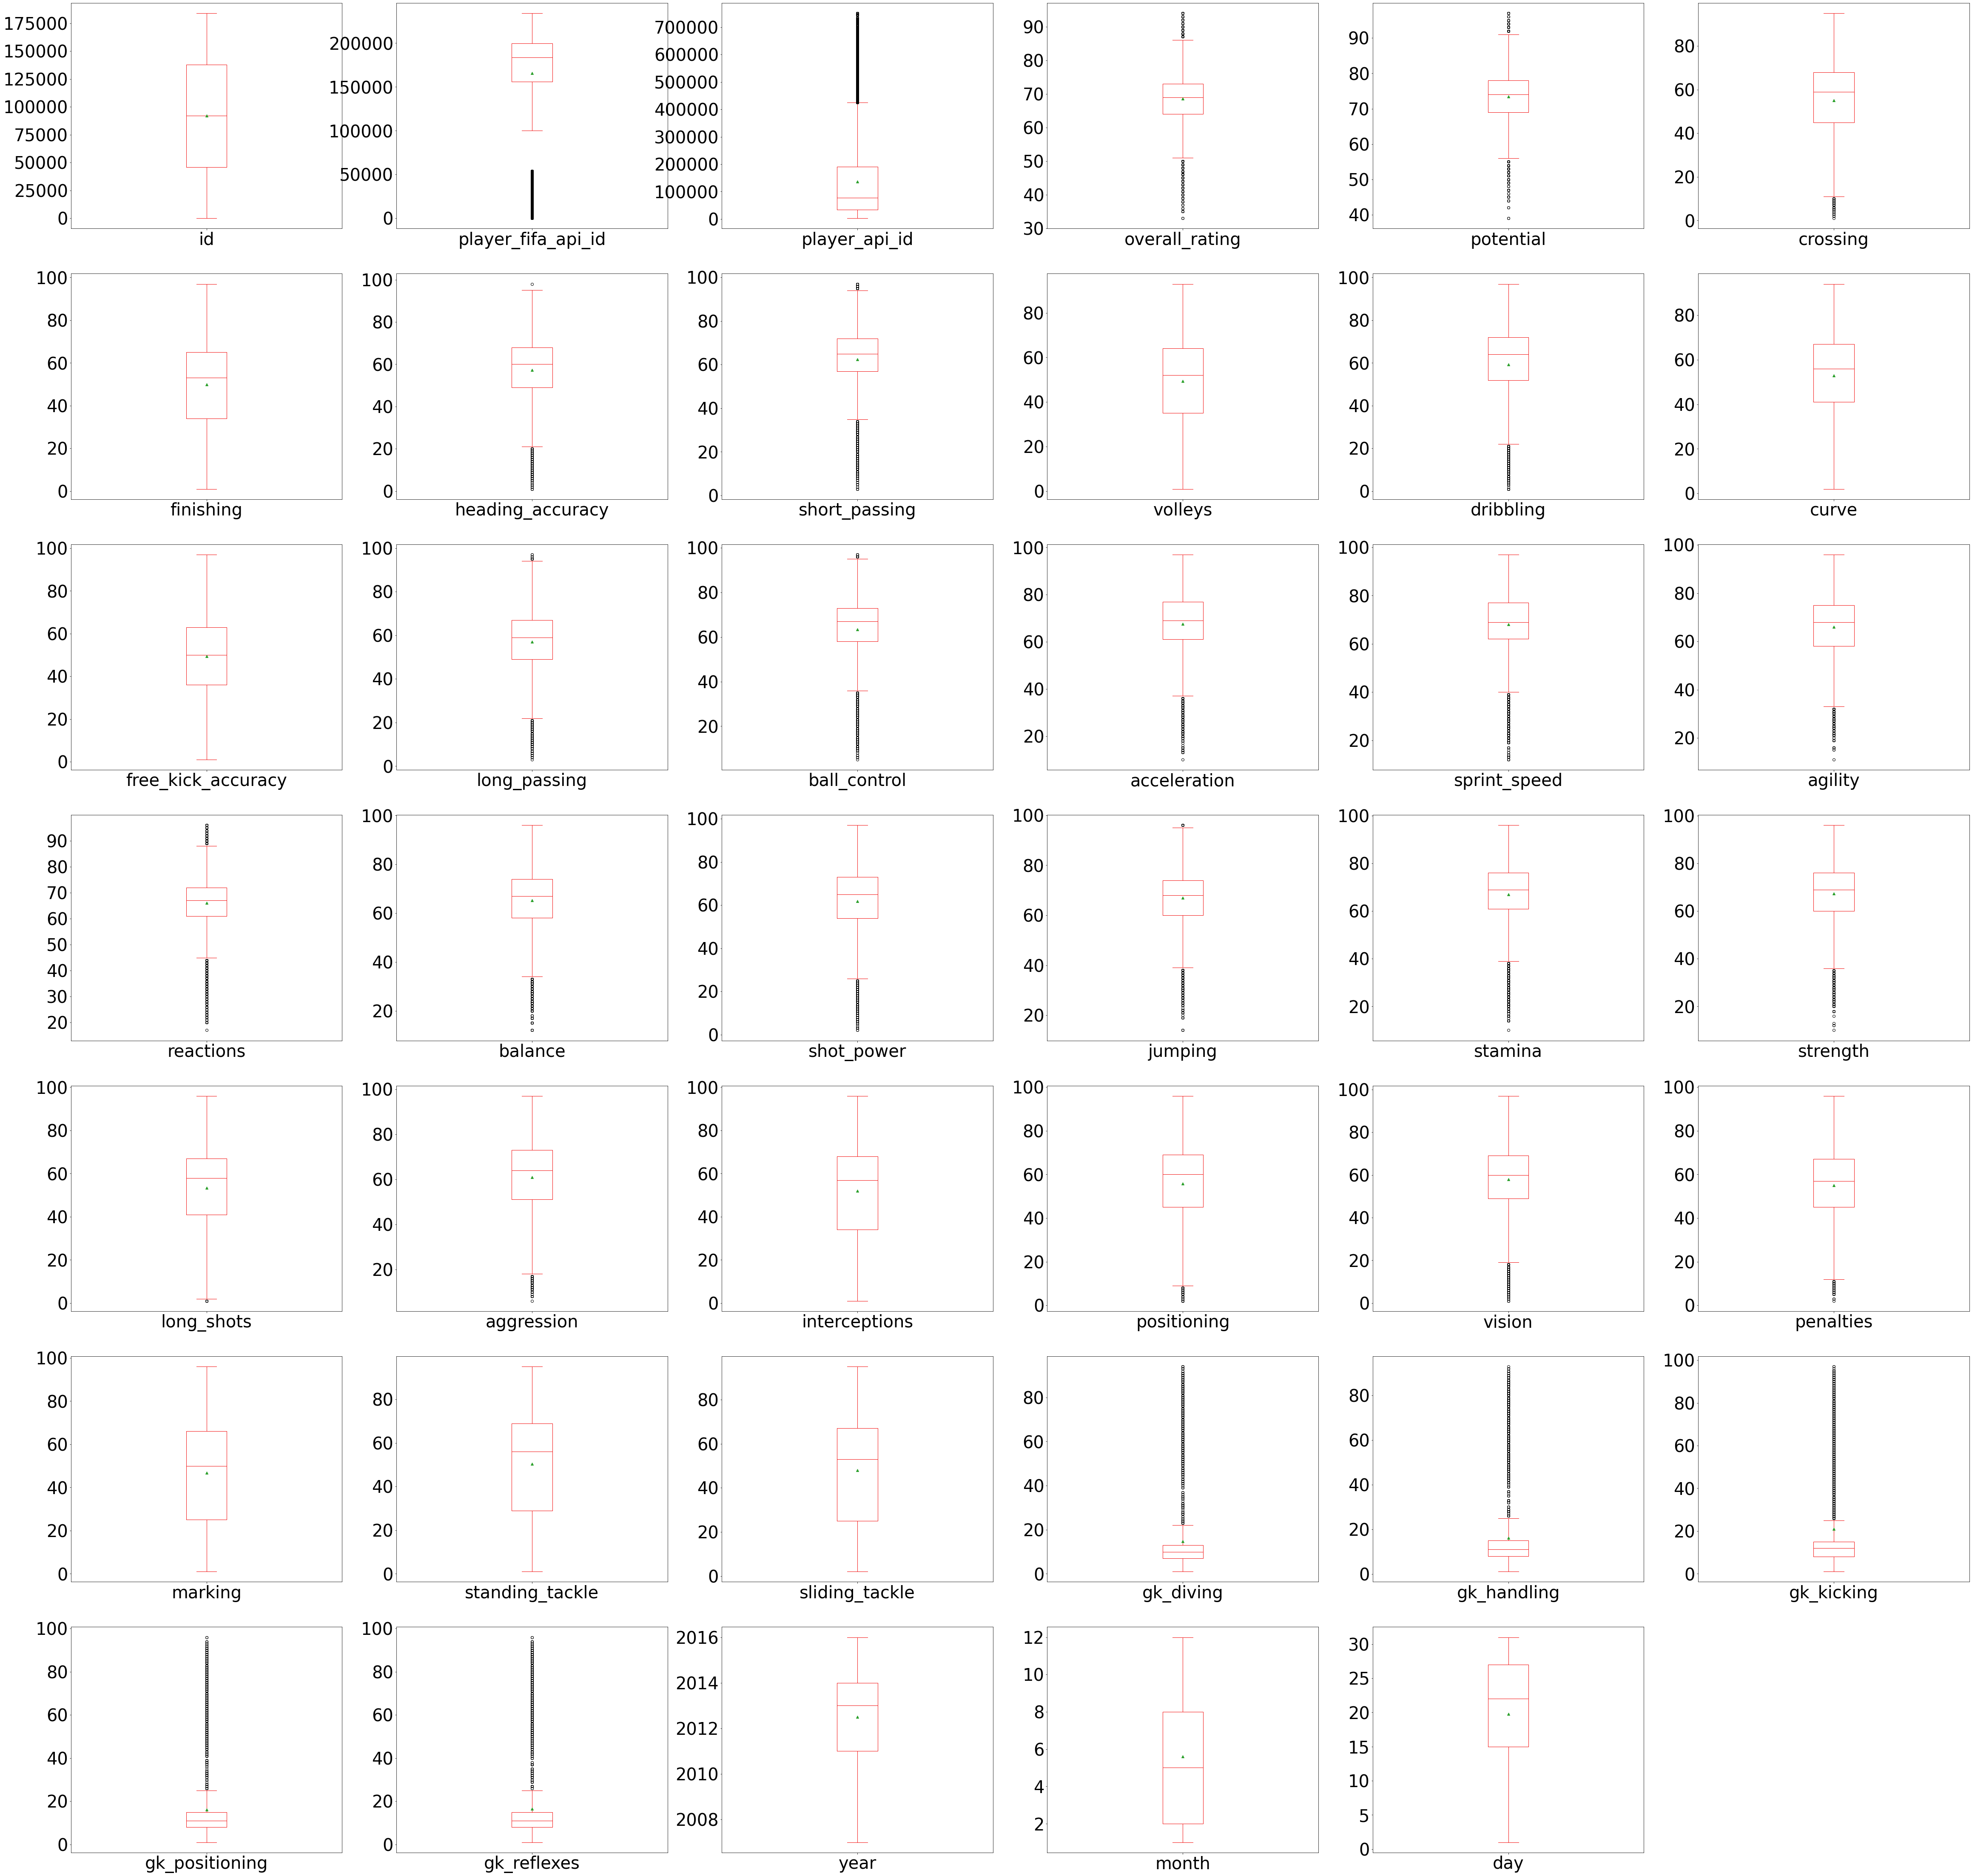

In [18]:
# Boxplots of the Player_Attributes table

df_tables['Player_Attributes'].plot(subplots=True,layout = (7,6),fontsize=40,kind = 'box',color = '#f21313',showmeans = True,figsize = (80,80))

plt.show()

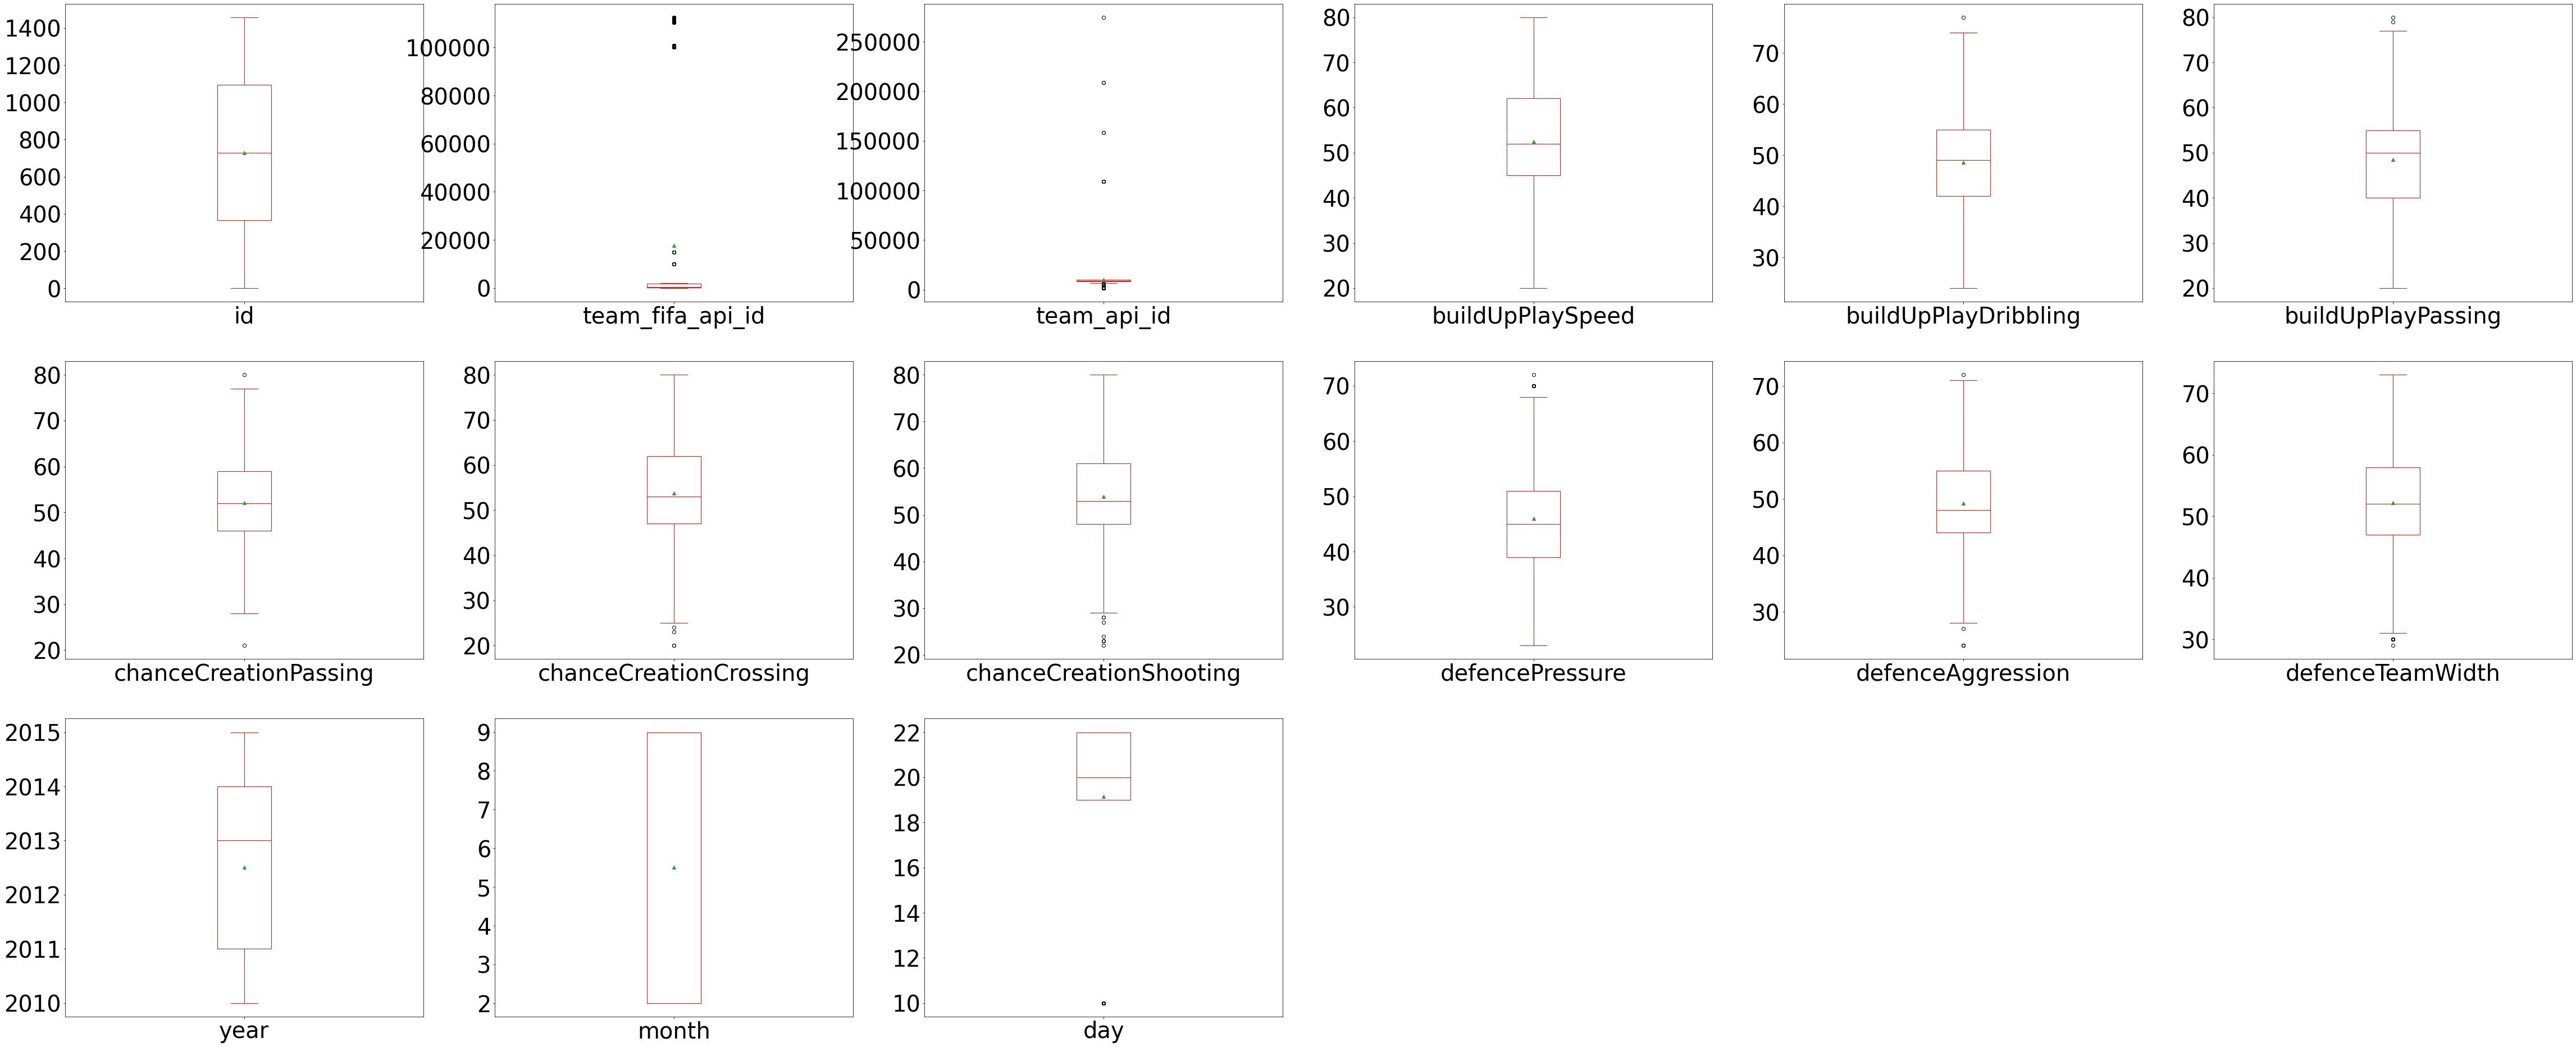

In [19]:
# Boxplots of the Team_Attributes table

df_tables['Team_Attributes'].plot(subplots=True,layout = (7,6),kind = 'box',color = '#f21313',fontsize=40,showmeans = True,figsize = (80,80))

plt.show()

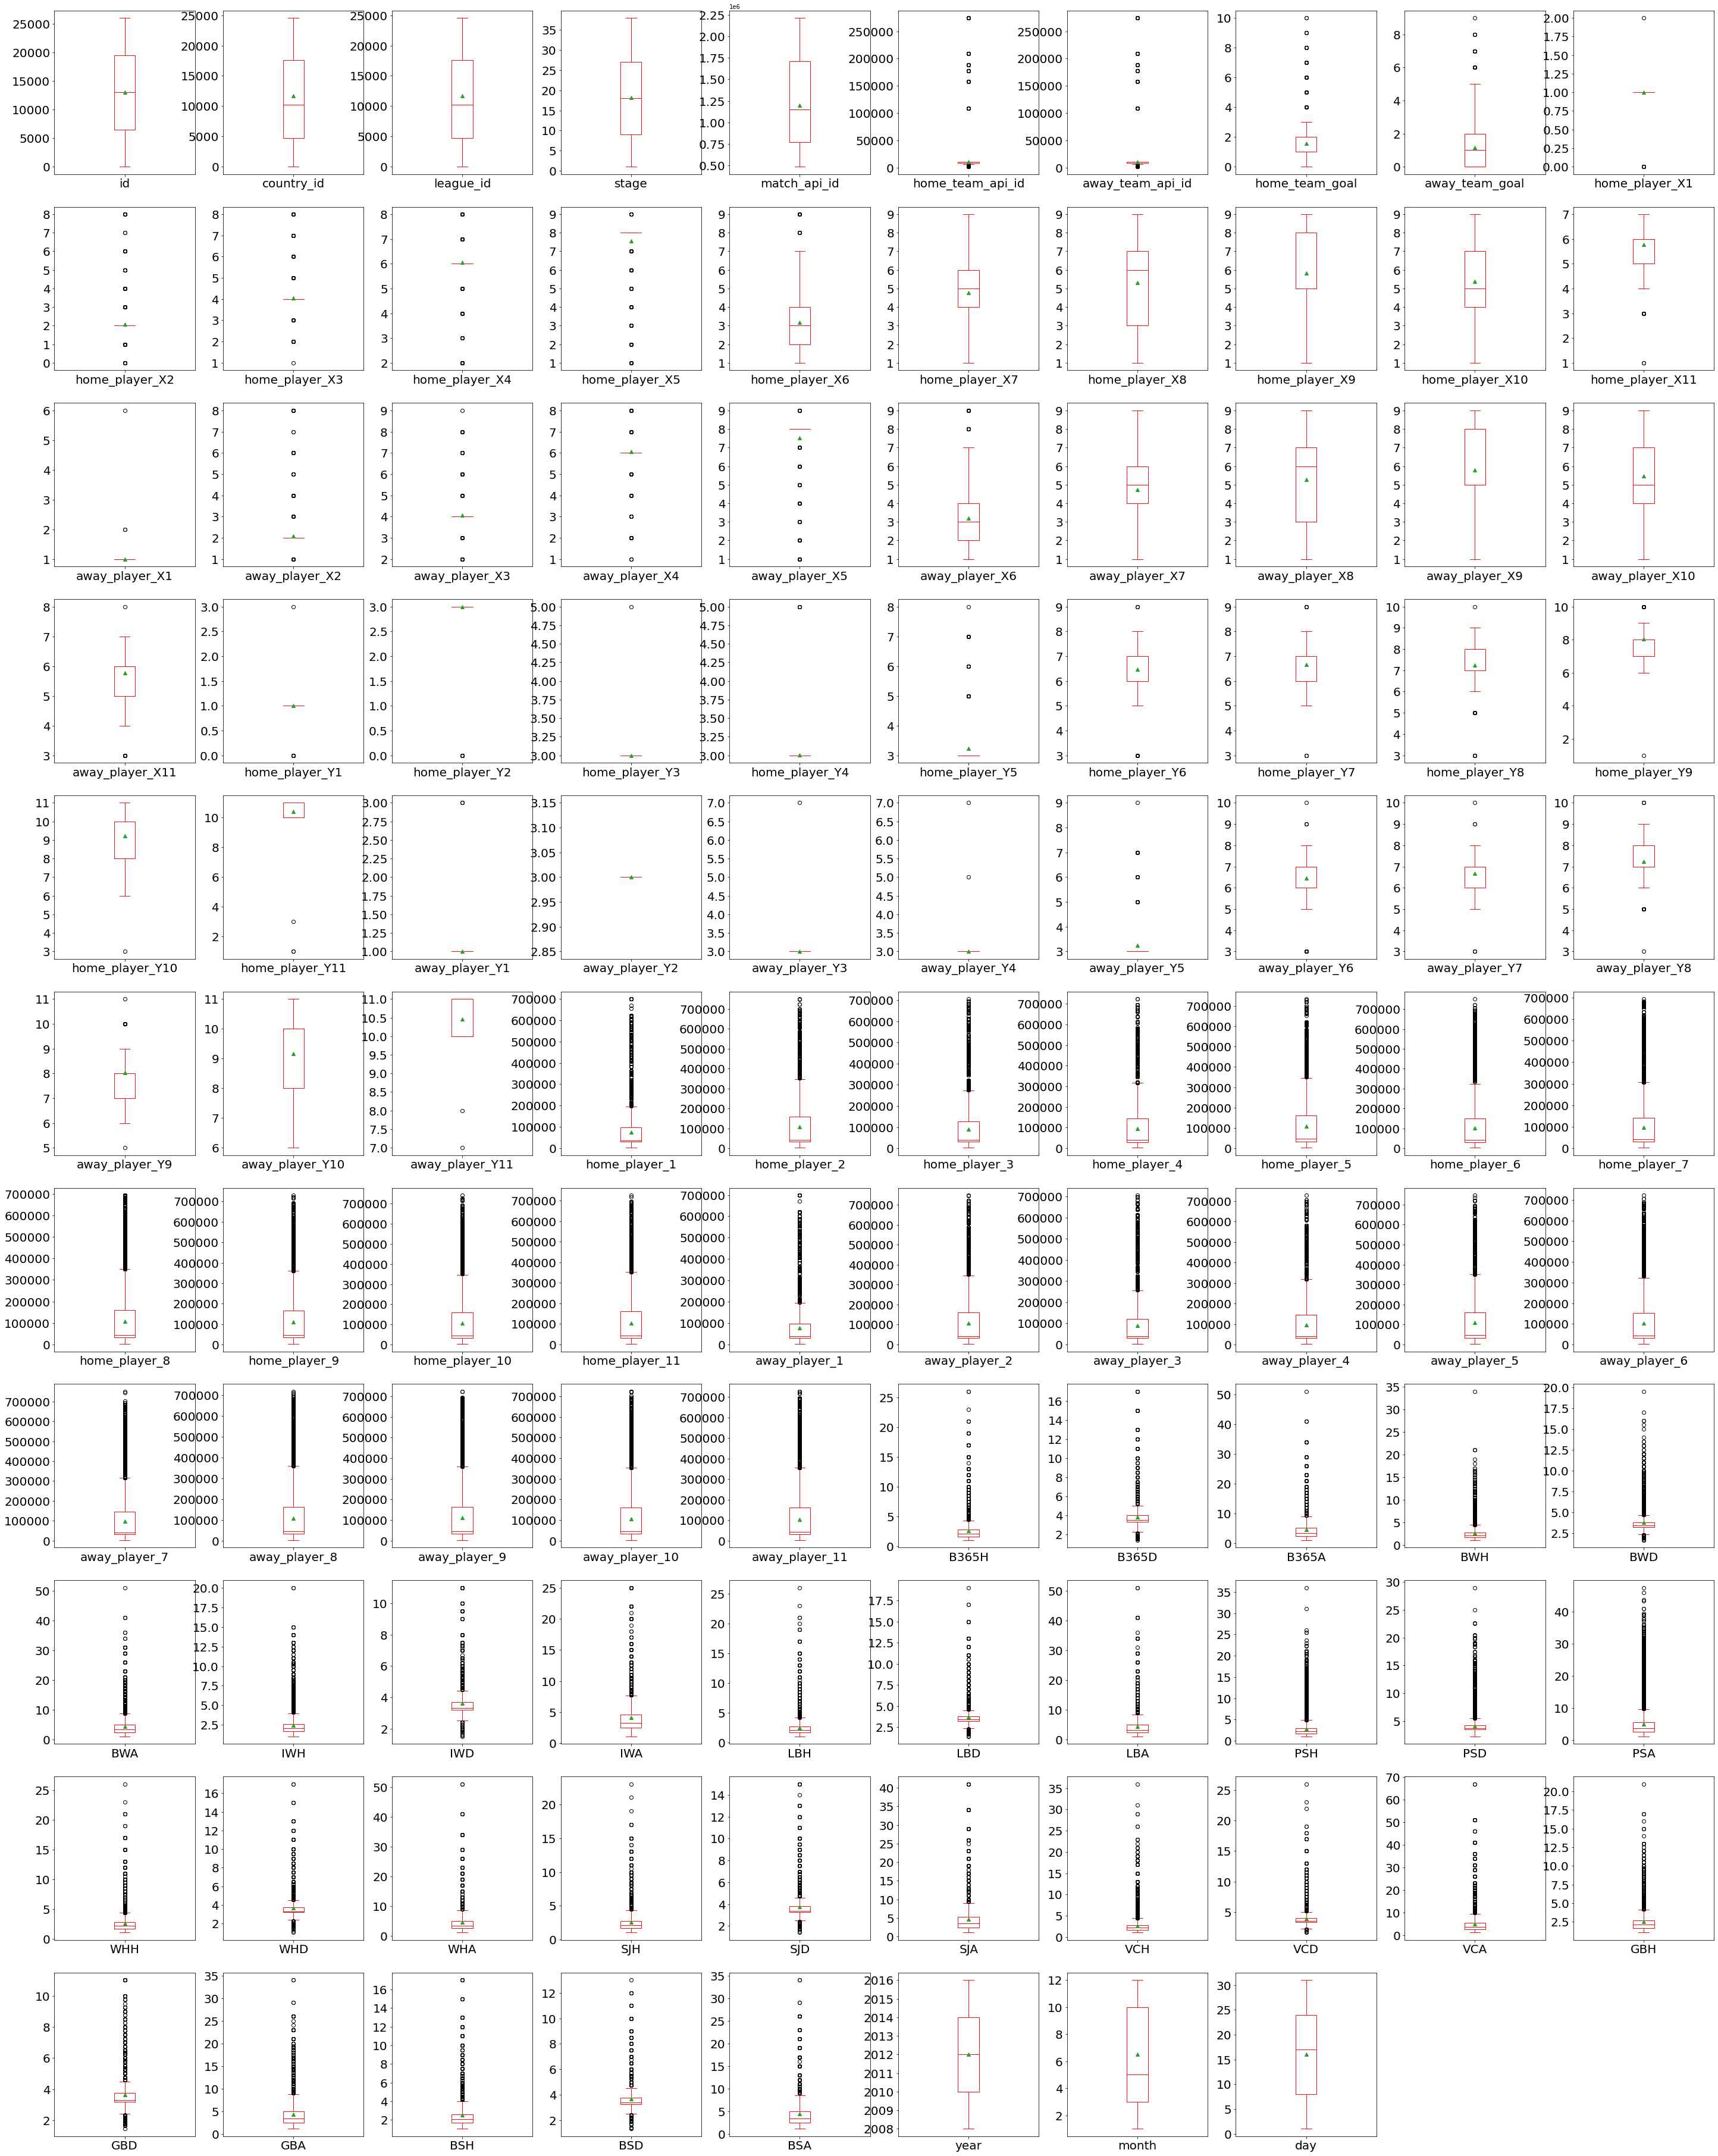

In [20]:
# Boxplot for the Match table

df_tables['Match'].plot(subplots=True,layout = (15,10),fontsize=20,kind = 'box',color = '#f21313',showmeans = True,figsize = (50,90))

plt.show()

### Notes

-> There are a lot of outliers in columns of the "Match" & "Player_Attributes" tables while
   the "Team_Attributes" table has only outliers in 2 columns ("chanceCreationShooting" & 
   "chanceCreationShooting")
   
### Decisions

-> prepare a function for detecting and removing outliers

In [21]:
'''
Preparing a function for applying the interquartile range method (IQR) for 

outlier detection and removing

'''

def clean_outliers(table_name):

    for col in list(df_tables[table_name].columns):

        if df_tables[table_name][col].dtype != object:

            q25,q75 = per(df_tables[table_name][col].values,25) , per(df_tables[table_name][col].values,75)

            IQR = q75 - q25

            cut_off = 1.5 * IQR

            lower,upper = q25 - cut_off , q75 + cut_off

            outliers = [x for x in df_tables[table_name][col].values if x >= lower or x <= upper]

            new_col = [x for x in df_tables[table_name][col].values if x >= lower and x <= upper]

            df_tables[table_name].drop([col],axis = 1,inplace = True)

            df_tables[table_name][col] = pd.DataFrame(new_col)
            
            return df_tables[table_name]

        

In [22]:
# Applying outlier detection and removal

for table_name in tables:
    
    clean_outliers(table_name)

## 6- EDA (Exploratory Data Analysis)

### 1- Which teams had scored the max number of goals ?


### Notes

-> This question is about finding the name of the teams from the "Team" table 
   and the number of goals from the "Match" table 

### Decisions

-> Merge the "Team" table and the "Match" table as the following:
    
    * The first merge will be via the columns "team_api_id" & "home_team_api_id"
    
    * The second merge will be via the columns "team_api_id" & "away_team_api_id"
    
    * From the first merge create a new table of home goals indexed by the team names
    
    * From the second merge create a new table of away goals indexed by the team names
    
    * Combine the (home goals + away goals) in one table indexed by the team names
    

In [23]:
match_df = df_tables['Match'].copy()

team_df = df_tables['Team'].copy()

merge1_df = pd.merge(team_df,match_df,left_on = 'team_api_id',right_on = 'home_team_api_id')

merge2_df = pd.merge(team_df,match_df,left_on = 'team_api_id',right_on = 'away_team_api_id')

home_goals = merge1_df.groupby('team_long_name')['home_team_goal'].sum()

away_goals = merge2_df.groupby('team_long_name')['away_team_goal'].sum()

Q1_df = pd.DataFrame(home_goals + away_goals).reset_index(level=0)

Q1_df.columns = ['Team Name','Goals']

Q1_df = Q1_df.sort_values(by='Goals',ascending = False)

Q1_df

,Team Name,Goals
75,FC Barcelona,849
211,Real Madrid CF,843
49,Celtic,695
77,FC Bayern Munich,653
184,PSV,652
15,Ajax,647
76,FC Basel,619
161,Manchester City,606
51,Chelsea,583
162,Manchester United,582


Text(0, 0.5, 'Top 10 teams')

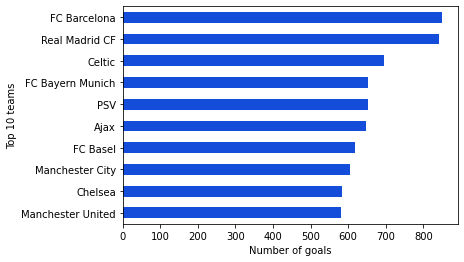

In [24]:
# Plotting the top 10 teams

Q1_df.iloc[:10].plot.barh(x='Team Name',y='Goals',color = '#154ddb',legend = None).invert_yaxis()

plt.xlabel('Number of goals')

plt.ylabel('Top 10 teams')


### 2- What are the team attributes most correlated to scoring the max number of goals ?


In [25]:
match_df = df_tables['Match'].copy()

team_attr_df = df_tables['Team_Attributes'].copy()

merge1_df = pd.merge(team_attr_df,match_df,left_on = 'team_api_id',right_on = 'home_team_api_id')

merge2_df = pd.merge(team_attr_df,match_df,left_on = 'team_api_id',right_on = 'away_team_api_id')

home_goals_corr = pd.DataFrame(merge1_df.corr()['home_team_goal']).reset_index(level=0)

away_goals_corr = pd.DataFrame(merge2_df.corr()['away_team_goal']).reset_index(level=0)

home_goals_corr.columns = ['Attributes','Correlation']

away_goals_corr.columns = ['Attributes','Correlation']


In [26]:
home_goals_corr = home_goals_corr.drop([0,1,14,15,16,18,19,20,122],axis=0) # Removing IDs from the attributes

home_goals_corr # The correlation between all attributes and the number of home team goals

,Attributes,Correlation
2,buildUpPlaySpeed,-0.007091
3,buildUpPlayDribbling,-0.026274
4,buildUpPlayPassing,-0.072564
5,chanceCreationPassing,0.020612
6,chanceCreationCrossing,0.003156
7,chanceCreationShooting,0.035146
8,defencePressure,0.082356
9,defenceAggression,0.031606
10,defenceTeamWidth,0.029427
11,year_x,0.001035


In [27]:
away_goals_corr = away_goals_corr.drop([0,1,14,15,16,18,19,20,122],axis=0) # Removing IDs from the attributes

away_goals_corr # The correlation between all attributes and the number of away team goals

,Attributes,Correlation
2,buildUpPlaySpeed,-0.003391
3,buildUpPlayDribbling,-0.009013
4,buildUpPlayPassing,-0.059954
5,chanceCreationPassing,0.019757
6,chanceCreationCrossing,0.008774
7,chanceCreationShooting,0.031000
8,defencePressure,0.079744
9,defenceAggression,0.031904
10,defenceTeamWidth,0.028130
11,year_x,0.002334


In [28]:
''' 
We want to find the correlation coefficients only for the team attributes 

which have been mixed with other attributes from the "Match" table due to the merge 

so the next two lines of code will select the team attributes only 

to get the correlation coefficients for them

''' 


home_goals_corr = home_goals_corr[home_goals_corr['Attributes'].isin(list(np.setdiff1d(home_goals_corr['Attributes'].tolist(),list(match_df.columns))))]

away_goals_corr = away_goals_corr[away_goals_corr['Attributes'].isin(list(np.setdiff1d(away_goals_corr['Attributes'].tolist(),list(match_df.columns))))]


In [29]:
# Now we have the correlation coeeficients for the team attributes only

home_goals_corr = home_goals_corr.sort_values(by='Correlation',ascending = False)

home_goals_corr

,Attributes,Correlation
8,defencePressure,0.082356
7,chanceCreationShooting,0.035146
9,defenceAggression,0.031606
10,defenceTeamWidth,0.029427
5,chanceCreationPassing,0.020612
120,month_y,0.004684
119,year_y,0.003831
6,chanceCreationCrossing,0.003156
11,year_x,0.001035
12,month_x,0.000908


In [30]:
away_goals_corr = away_goals_corr.sort_values(by='Correlation',ascending = False)

away_goals_corr

,Attributes,Correlation
8,defencePressure,0.079744
9,defenceAggression,0.031904
7,chanceCreationShooting,0.031000
10,defenceTeamWidth,0.028130
119,year_y,0.021026
5,chanceCreationPassing,0.019757
120,month_y,0.011415
6,chanceCreationCrossing,0.008774
121,day_y,0.002647
12,month_x,0.002484


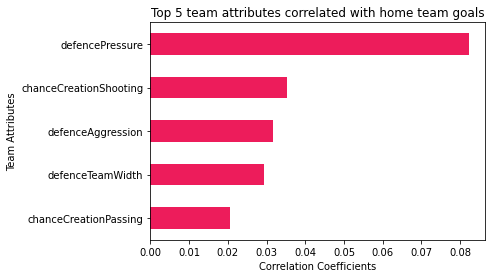

In [31]:
# Plotting the top 5 team attributes correlated with home team goals

home_goals_corr.iloc[:5].plot.barh(x='Attributes',y='Correlation',color = '#ed1c5b',legend = None).invert_yaxis()

plt.title('Top 5 team attributes correlated with home team goals')

plt.xlabel('Correlation Coefficients')

plt.ylabel('Team Attributes')

plt.show()

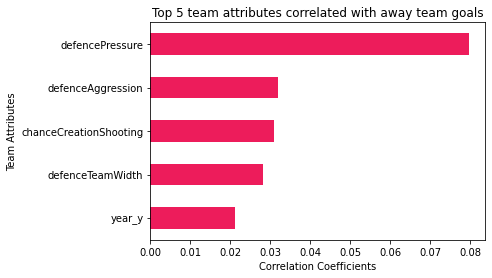

In [32]:
# Plotting the top 5 team attributes correlated with away team goals

away_goals_corr.iloc[:5].plot.barh(x='Attributes',y='Correlation',color = '#ed1c5b',legend = None).invert_yaxis()

plt.title('Top 5 team attributes correlated with away team goals')

plt.xlabel('Correlation Coefficients')

plt.ylabel('Team Attributes')

plt.show()

### 3- Which players had the max OVR (overall rating) ?


In [33]:
player_df = df_tables['Player'].copy()

player_attr_df = df_tables['Player_Attributes'].copy()

merge_df = pd.merge(player_df,player_attr_df,left_on = 'player_api_id',right_on = 'player_api_id')

merge_df

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,year_x,month_x,day_x,player_fifa_api_id_y,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year_y,month_y,day_y,id_y
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,1992,2,29,218353,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016,2,18,1
1,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,1992,2,29,218353,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015,11,19,2
2,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,1992,2,29,218353,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015,9,21,3
3,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,1992,2,29,218353,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2015,3,20,4
4,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,1992,2,29,218353,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2007,2,22,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,11075,39902,Zvjezdan Misimovic,102359,1982-06-05,180.34,176,1982,6,5,102359,2009-08-30,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,2009,8,30,183974
183974,11075,39902,Zvjezdan Misimovic,102359,1982-06-05,180.34,176,1982,6,5,102359,2009-02-22,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,2009,2,22,183975
183975,11075,39902,Zvjezdan Misimovic,102359,1982-06-05,180.34,176,1982,6,5,102359,2008-08-30,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,2008,8,30,183976
183976,11075,39902,Zvjezdan Misimovic,102359,1982-06-05,180.34,176,1982,6,5,102359,2007-08-30,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0,2007,8,30,183977


In [34]:
Q3_df = pd.DataFrame(merge_df.groupby('player_name').overall_rating.sum()).reset_index(level=0)

Q3_df = Q3_df.sort_values(by='overall_rating',ascending = False)

Q3_df.columns = ['Player Name','OVR']

Q3_df.OVR = Q3_df.OVR.astype('int')

Q3_df

,Player Name,OVR
2168,Danilo,7894
396,Alex,7118
2726,Douglas,6606
3210,Felipe,6452
8705,Ricardo,5883
...,...,...
9803,Steven De Pauw,100
9885,Sven De Volder,98
2321,David Hopkirk,98
1175,Benjamin Fischer,92


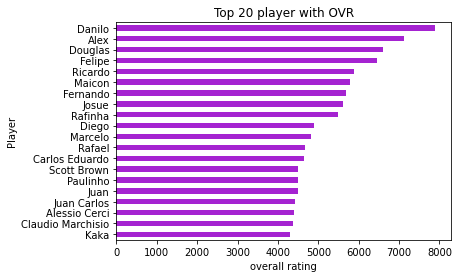

In [35]:
Q3_df.iloc[:20].plot.barh(x='Player Name',y='OVR',color = '#a523d1',legend = None).invert_yaxis()

plt.title('Top 20 player with OVR')

plt.xlabel('overall rating')

plt.ylabel('Player')

plt.show()

### 4- What are the player attributes most correlated to the max OVR (overall rating) ?


In [36]:
player_attr_df = df_tables['Player_Attributes'].copy()

Q4_df = pd.DataFrame(player_attr_df.corr()['overall_rating']).reset_index(level=0)

Q4_df.columns = ['Player Attribute','Correlation']

Q4_df = Q4_df.sort_values(by = 'Correlation',ascending = False)

Q4_df

,Player Attribute,Correlation
2,overall_rating,1.000000
17,reactions,0.769246
3,potential,0.766757
7,short_passing,0.458361
13,ball_control,0.444257
12,long_passing,0.435018
27,vision,0.431137
19,shot_power,0.427996
28,penalties,0.393189
23,long_shots,0.392382


Text(0.5, 1.0, 'The top 10 attributes correlated with OVR')

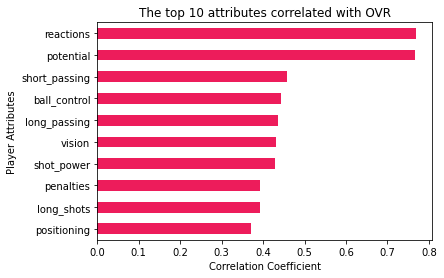

In [37]:
# Plotting the top 10 player attributes correlated with OVR (overall rating)

Q4_df.iloc[1:11].plot.barh(x='Player Attribute',y='Correlation',color = '#ed1c5b',legend = None).invert_yaxis()

plt.xlabel('Correlation Coefficient')

plt.ylabel('Player Attributes')

plt.title('The top 10 attributes correlated with OVR')

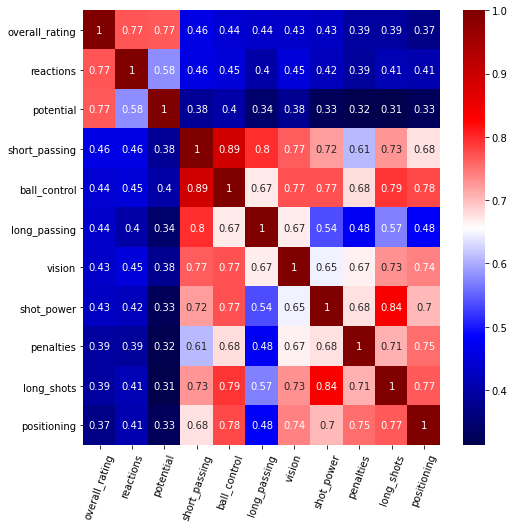

In [38]:
# Plotting a heatmap for the top 10 features

top10_attr = player_attr_df[Q4_df['Player Attribute'].iloc[:11]]

plt.figure(figsize=(8,8))

plt.xticks(rotation=70)

sns.heatmap(top10_attr.corr(),annot = True,cmap='seismic')

plt.show()

### 5- Which players had the most penalties ?


### Notes

-> This question is about getting the names of players from the "Player" table
   and the number of penalties from the "Player_Attributes" table

### Decisions

-> Merge the tables "Player" & "Player_Attributes" via the "player_api_id" column

-> sum the penalties for each "player_name" and plot the top 20 

In [39]:
player_attr_df = df_tables['Player_Attributes'].copy()

player_df = df_tables['Player'].copy()

merge = pd.merge(player_df,player_attr_df,left_on = 'player_api_id',right_on = 'player_api_id')

Q5_df = pd.DataFrame(merge.groupby('player_name').penalties.sum())

Q5_df = Q5_df.reset_index(level=0)

Q5_df.columns  = ['Player','Penalties']

Q5_df = Q5_df.sort_values(by='Penalties',ascending = False)

Q5_df

,Player,Penalties
2168,Danilo,6358.0
396,Alex,6140.0
3242,Fernando,4764.0
2726,Douglas,4687.0
5309,Josue,4671.0
...,...,...
9115,Rui Vieira,45.0
8711,Ricardo Campos,39.0
2772,Dziugas Bartkus,36.0
9894,Sven van der Jeugt,28.0


Text(0.5, 1.0, 'The top 20 player with penalties')

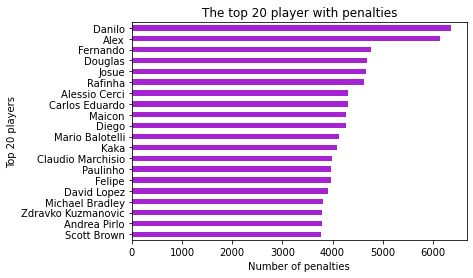

In [40]:
# Plotting the top 20 players with max number of penalties

Q5_df.iloc[:20].plot.barh(x='Player',y='Penalties',color = '#a523d1',legend = None).invert_yaxis()

plt.xlabel('Number of penalties')

plt.ylabel('Top 20 players')

plt.title('The top 20 player with penalties')

### 6- Which leagues had scored the max number of goals ?


### Notes

-> This question is about finding the names of the leagues from the "Leagues" table and the
   number of goals (home + away) from the "Match" table
   
### Decisions

-> Merge the "League" table and the "Match" table via the columns 'id' & 'league_id'
    
-> create 2 tables of home goals and away goals where each table is indexed by the team names

-> combine the goals (home + away) in a new table and plot the top 5 leagues according to 
   number of goals

In [41]:
league_df = df_tables['League'].copy()

match_df = df_tables['Match'].copy()

merge = pd.merge(league_df,match_df,left_on = 'id',right_on = 'league_id')

home_goals = merge.groupby('name').home_team_goal.sum()

away_goals = merge.groupby('name').away_team_goal.sum()

Q6_df = pd.DataFrame(home_goals + away_goals).reset_index(level=0)

Q6_df.columns = ['League','Goals']

Q6_df = Q6_df.sort_values(by='Goals',ascending = False)

Q6_df

,League,Goals
9,Spain LIGA BBVA,8412
1,England Premier League,8240
4,Italy Serie A,7895
5,Netherlands Eredivisie,7542
2,France Ligue 1,7427
3,Germany 1. Bundesliga,7103
7,Portugal Liga ZON Sagres,5201
0,Belgium Jupiler League,4841
8,Scotland Premier League,4804
6,Poland Ekstraklasa,4656


Text(0, 0.5, 'Top 5 leagues')

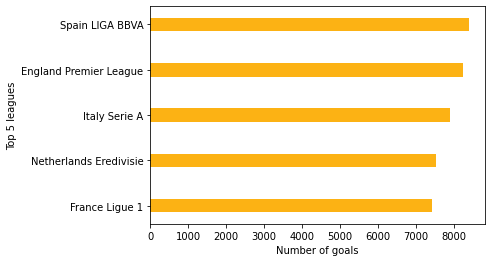

In [42]:
# Plotting the top 5 leagues

Q6_df.iloc[:5].plot.barh(x='League',y = 'Goals',color = '#fcb214',width = 0.3,legend = None).invert_yaxis()

plt.xlabel('Number of goals')

plt.ylabel('Top 5 leagues')


## Limitations

* There is no metadata to provide a proper explanation for each coulmn in our database (Specifically
  in the "Match" table). The lack of this information remained a definite handicap during the 
  analysis process as it confined the analysis to using the columns which were self_explanatory
  or searching online for the missing metadata.
  
  
  

* As mentioned in the data description on kaggle https://www.kaggle.com/hugomathien/soccer there 
  are some players that are missing from the lineup. This is because the dataset owner had not 
  been able to source their attributes from FIFA.

# Conclusions


* It's clear from the analysis that in general the defence skills are the most important attributes for any team to achieve victories


* Interestingly, the most important attribute for any player is the "Reaction" which is defined as the acting speed of a player in response to the situations happening around them


* Many of the players who had the most penalties are also the top goal scorers so it's logical


* FC Barcelona is the top team with a score of 849 goals


* The spanish league is the top league with a score of 8412 goals



# References

## Links

-> https://pandas.pydata.org/pandas-docs/stable/index.html for pandas documentation

-> https://matplotlib.org/stable/api/pyplot_summary.html for matplotlib documentation

-> https://www.football-data.co.uk/notes.txt for missing  metadata about 
   columns from the "Match" table
   
-> https://www.fifplay.com/encyclopedia/player-attributes/ for missing metadata 
   about columns from the "Player_Attributes" table
   
   

